#  PROJETO INTEGRADOR - GRUPO 5 - RESPIROBEM

<br>
<img src="images/RespiroBem.png"/>
<br>

Parte fundamental da atuação de um profissional de dados é encontrar nexos e conexões entre os dados e melhores decisões. Resolução de  um problema a partir da exploração e análise de dados que tragam mais informações sobre o cenário e que embasem, obviamente, possíveis soluções/intervenções.

**O Desafio**

Prever a qualidade do ar em São Paulo (capital) e gerar um AQ SCORE diário, com implementações práticas, tais como:

**O que é AQ SCORE?**

É uma nota numérica de 1 até 10, que represente o risco da poluição do ar em São Paulo (capital), gerado por um algoritmo que é alimentado por várias fontes de dados relevantes. O score pode ser usado para as implementações abaixo e mais, por multiplicar qualquer variável relevante (horas, número de médicos no plantão etc.) – antecipando e lidando numa forma proativa com o impacto da poluição do ar.

**Implementações Potenciais**

Recomendações para asmáticos, hipertensos.

**Oportunidades futuras**

- Percentual de aumento de medicamentos respiratórios nas unidades médicas dada uma piora na qualidade do ar
- Percentual recomendável de pessoas trabalhando em casa para reduzir os deslocamentos, por transporte público ou privado, na cidade
- Quais regiões da cidade deve-se evitar vir de carro (serviço publico oferecido pela CET, via API, para outros sites)

**Sistemas de Referência**

Breezometer - https://breezometer.com/

WAQI - http://aqicn.org/

**Inputs**

- **Climáticos**

    - Temperatura
    - Umidade
    - Pressão do ar
    - Velocidade e direção do vento


- **Qualidade do ar**

    - **Partículas suspensas na atmosfera (PM2.5 e PM10)**
    - Emissão de gases por veículos
    - Tráfego de veículos
    - Gases
    - Dióxido de enxofre (SO2)
    - Óxidos de nitrogênio (NOx)
    - Ozônio (O3)
    - Monóxido de carbono (CO)

**Outputs do modelo (AQ scores potenciais)**

- Ótima (9-10)
- Boa (7-8)
- Moderada (5-6)
- Ruim (3-4)
- Perigosa (1–2)
- Letal (0)

**Proposta de estrutura de modelagem**

Algoritmos utilizados em projeto Koreano:

- Para os dados climáticos – CNN (Convulotional Neural Network)
- Para os poluentes – LSTM (Long Short-Term Memory)
- A fórmula da combinação (combination, é uma serie temporal):  

$$y = \alpha * y_{lstm} + (1 - \alpha) * (x_\omega * \omega + b)$$

*with y is the final output, y_lstm is the output of the LSTM unit, x_w, w, b is the input, weight, and bias of the NN model, $\alpha$ is the combined weight, 0 ≤ $\alpha$ ≤ 1. In the experiment section, we will show how different values of this weight reflect the affection of weather conditions to air pollution prediction.*

**Fontes**

- SUS – Serviços de saúde - http://saude.gov.br/sistema-unico-de-saude
- CETESB – emissão de poluentes por veículos - https://cetesb.sp.gov.br/veicular/relatorios-e-publicacoes/
- INMET – condições climáticas - http://www.inmet.gov.br/sonabra/pg_dspDadosCodigo_sim.php?QTcwMQ==
- Real-time Air Pollution prediction model based on Spatiotemporal Big data - https://arxiv.org/abs/1805.00432

**Análise das Métricas para avaliação do Modelo**

- ***Mean Error (ME)***

Simplesmente a média de todos os erros individuais.  
Pode ser igual a 0, os erros negativos e positovos se anulam.  
Não é uma boa medida.

- ***Mean Absolute Error (MAE)***

Minimiza os efeitos de poucos pontos ruins.  
Torna-os proporcionais a métrica geral.

- ***Mean Squared Error (MSE)***

Eleva-se o erro médio ao quadrado, evitando a armadilha do erro 0.  
Pode ser aplicada a series temporais.  
A magnitude do erro não é comparável com o target.

- ***Root Mean Squared Error (RMSE)***

Magnitude dos erros comparável.  
Penaliza erros maiores.  
Favorece técnicas em que a magnitude do erro é constante.   
Poucos pontos ruins podem prejudicar um bom modelo.

<table>
<thead>
<tr>
<th>Acroynm</th>
<th>Full Name</th>
<th>Residual Operation?</th>
<th>Robust To Outliers?</th>
</tr>
</thead>
<tr>
<td>MAE</td>
<td>Mean Absolute Error</td>
<td>Absolute Value</td>
<td>Yes</td>
</tr>
<tr>
<td>MSE</td>
<td>Mean Squared Error</td>
<td>Square</td>
<td>No</td>
</tr>
<tr>
<td>RMSE</td>
<td>Root Mean Squared Error</td>
<td>Square</td>
<td>No</td>
</tr>
<tr>
<td>MAPE</td>
<td>Mean Absolute Percentage Error</td>
<td>Absolute Value</td>
<td>Yes</td>
</tr>
<tr>
<td>MPE</td>
<td>Mean Percentage Error</td>
<td>N/A</td>
<td>Yes</td>
</tr>
</table>

Fonte: https://www.dataquest.io/blog/understanding-regression-error-metrics/

- ***Mean Squared Logarithmic Error (MSLE)***

Diferença relativa entre os valores preditos e reais.  
Penaliza subestimações mais superestimações.  
Variáveis normalmente distribuídas.  

**MSLE math**

*The loss is the mean over the seen data of the squared differences between the log-transformed true and predicted values, or writing it as a formula:*

$$L(y,\hat{y}) = \frac{1}{N}\sum_{i=0}^{N}(log(y_i + 1) - log(\hat{y}_i + 1))^{2}$$

*where ŷ is the predicted value.*

*This loss can be interpreted as a measure of the ratio between the true and predicted values, since:*

$$log(y_i + 1) - log(\hat{y}_i + 1) = log(\frac{y_i + 1}{\hat{y}_i + 1})$$

Fonte: https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error

- ***Root Mean Squared Logarithmic Error (RMSLE)***

*It is just an RMSE calculated in logarithmic scale. In fact, to calculate it, we take a logarithm of our predictions and the target values, and compute RMSE between them. The targets are usually non-negative but can equal to 0, and the logarithm of 0 is not defined. That is why a constant is usually added to the predictions and the targets before applying the logarithmic operation. This constant can also be chosen to be different to one depending on the problem.*

$$RMSE = \sqrt{ \frac{1}{N}\sum_{i=1}^{N}(log(y_i + 1) - log(\hat{y}_i + 1))^{2}) }$$

Fonte: https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-2-regression-metrics-d4a1a9ba3d74

In [1]:
import math

# A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

**What is the difference between an RMSE and RMSLE (logarithmic error), and does a high RMSE imply low RMSLE?**

Root Mean Squared Error (RMSE) and Root Mean Squared Logarithmic Error (RMSLE) both are the techniques to find out the difference between the values predicted by your machine learning model and the actual values.

To understand these concepts and their differences, it is important to know what does Mean Squared Error (MSE) mean. MSE incorporates both the variance and the bias of the predictor. RMSE is the square root of MSE. In case of unbiased estimator, RMSE is just the square root of variance, which is actually Standard Deviation.

Note: Square root of variance is standard deviation.

In case of RMSLE, you take the log of the predictions and actual values. So basically, what changes is the variance that you are measuring. I believe RMSLE is usually used when you don't want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers.

If both predicted and actual values are small: RMSE and RMSLE is same.
If either predicted or the actual value is big: RMSE > RMSLE
If both predicted and actual values are big: RMSE > RMSLE (RMSLE becomes almost negligible)

Fonte: https://www.quora.com/What-is-the-difference-between-an-RMSE-and-RMSLE-logarithmic-error-and-does-a-high-RMSE-imply-low-RMSLE

**Poluição do AR**

O desenvolvimento dos grandes centros urbanos e o consumo cada vez mais exagerado dos humanos são os grandes responsáveis por tornar o mundo cada dia mais poluído. A poluição é um problema real que atinge o ar, a água e o solo, tornando-se cada vez mais acentuada graças às nossas atitudes.

A poluição do ar pode ser definida como a presença de substâncias provenientes de atividades humanas ou da própria natureza que podem colocar em risco a qualidade de vida dos seres vivos. O ar poluído pode causar sérios problemas ao homem e a outros seres, portanto, ele é impróprio e nocivo.

Fonte: https://mundoeducacao.bol.uol.com.br/biologia/poluicao-ar.htm

In [2]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Mpu0_QifoHo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**O que caracteriza um poluente?**

Poluentes atmosféricos são gases e partículas sólidas (poeiras, pós e fumos) resultantes das atividades humanas e de fenômenos naturais dispersos no ar atmosférico. Desta forma, classificam-se nessa categoria, os gases e partículas expelidos por veículos e indústrias e também aqueles oriundos da degradação da matéria orgânica, vulcanismos e outros fenômenos naturais. Incluem-se nesta lista as substâncias formadas pela reação de certos poluentes com a radiação advinda do sol.

Fonte: http://www.ebc.com.br/infantil/voce-sabia/2015/08/poluicao-do-ar-o-que-sao-os-poluentes-atmosfericos

**O que é pm10?**

PM10 é a sigla, em inglês, utilizada para descrever matéria partículada em suspensão na atmosfera e que são menores ou iguais a 10 micrômetros. Para se ter ideia, 1 micrômetro corresponde a um metro dividido por um milhão. Assim partículas menores ou iguais a 10 micrômetros  são extremamente pequenas e, por essa razão, penetram no sistema respiratório podendo causar o agravamento de doenças respiratórias como bronquites por exemplo.

Pela razão exposta, o PM10 é um indicador de qualidade do ar utilizado pelas agências ambientais para monitorar e tomar ações de controle da qualidade do ar em caso de elevação do PM10 acima dos níveis considerados seguros à saúde humana.

Fonte: https://www.webartigos.com/artigos/poluicao-do-ar-pm10/123590/

**O que é mp2.5?**

Particulados, ou material particulado (sigla em inglês, PM, de ***particulate matter***), são partículas muito finas de sólidos ou líquidos suspensos no ar. Para ser considerado PM, suas dimensões (diâmetro) variam desde 20 micra até menos de 0,05 mícron.

Fonte: https://pt.m.wikipedia.org/wiki/Material_particulado

Do ponto de vista da poluição global o material particulado atmosférico (MP) afeta diretamente o clima do planeta através da dispersão e absorção da radiação solar e, indiretamente, atuando como núcleo de condensação nos processos de formação de nuvens.1,2 Como poluente do ar o MP tem ainda recebido atenção devido aos problemas que causam na saúde humana.

O material particulado é classificado por seu tamanho considerando o diâmetro aerodinâmico médio das partículas. As partículas inaláveis grossas (MP2,5-10) são as que possuem o diâmetro aerodinâmico médio no intervalo de 2,5 a 10 μm e as partículas finas ou respiráveis (MP2,5) são as inferiores a 2,5 μm. Recentemente o MP inferior a 2,5 μm são denominados de partículas quasi-ultrafinas (MP0,25 ) e ultrafinas (MP0,1).3

Estudos relacionados aos efeitos da poluição na saúde4-7 mostraram a associação entre a exposição ao material particulado fino com mortes prematuras, doenças mutagênicas e problemas respiratórios, pois é esta a fração que penetra no trato respiratório humano (nível alveolar), onde os mecanismos de expulsão destes poluentes não são eficientes. O particulado grosso pode acumular-se nas vias respiratórias superiores, agravando problemas respiratórios como o da asma. O perigo causado pela inalação de partículas depende não só da forma e tamanho das mesmas como também da composição química e do lugar no qual elas foram depositadas no sistema respiratório.8,9

Fonte: http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0100-40422009000700013

REFERÊNCIAS

1. Ramanathan, V.; Ramana, M. V.; Roberts, G.; Kim, D.; Corrigan, C.; Chung, C.; Nature 2007, 448, 575.
2. Jacobson, M. Z.; J. Geophys. Res. 2004, 109, 1.
3. Minguillón, M. C.; Arhami, M.; Schauer, J. J.; Sioutas, C.; Atmos. Environ. 2008, 42, 7317.
4. Michelozzi, P.; Forastiere, F.; Fusco, D.; Perucci, C. A.; Ostro, B.; Ancona, C.; Palloti, G.; Occup. Environ. Med. 1998, 55, 605.
5. Oberrdorster, G.; Int. Arch. Occup. Environ. Health 2001, 74, 1.
6. Brunekreef, B.; Forsberg, B.; Eur. Resp. J. 2005, 26, 309.
7. Delafino, R. J.; Sioutas, C.; Mailik, S.; Environ. Health Perspect. 2006, 113, 934.
8. Pope, C. A.; Dockery, D. W.; J. Air Waste Manage. Assoc. 2006, 56, 709.
9. Harrison, R. M.; Stedman, J.; Derwent, D.; Atmos. Environ. 2008, 42, 603.

### Bibliografia a respeito do o vento

http://www.scielo.br/pdf/rbmet/v23n1/03.pdf

https://periodicos.itp.ifsp.edu.br/index.php/IC/article/viewFile/744/844



**Estações Meteorológicas em São Paulo**

<br>
<img src="images/estacao_cetesb.jpeg"/>
<br>

A partir da biblioteca ***Folium*** é possível plotar um mapa com a localização geográfica das estações meteorológicas na cidade de São Paulo.

In [3]:
#!pip install folium

In [3]:
import pandas as pd
import folium

In [4]:
est_cetesb = pd.read_csv(r'datasets/estacoes-cetesb.csv')
est_cetesb.head()

,DATA,Efeito,Endereco,ID,Indice,MsgSaude,Municipio,Nome,POLUENTE,Qualidade,Situacao_Rede,Tipo_Rede,x,y,ID2
0,2019-08-18 18:00:00.000,Pessoas com doenças respiratórias podem aprese...,"R TAILANDIA, 364",1,43.0,"Pessoas com doenças cardíacas ou pulmonares, p...",AMERICANA,Americana,MP10,N2 - MODERADA,A,A,-47.347456,-22.724507,65
1,2019-08-18 18:00:00.000,NaN,"R CLOVIS PESTANA, 801",2,34.0,NaN,ARACATUBA,Araçatuba,MP10,N1 - BOA,A,A,-50.439317,-21.186841,72
2,2019-08-18 18:00:00.000,NaN,"AV ANGELO HORTENCE, 1990",3,37.0,NaN,ARARAQUARA,Araraquara,O3,N1 - BOA,A,A,-48.185832,-21.782522,71
3,2019-08-18 18:00:00.000,Pessoas com doenças respiratórias podem aprese...,"R CASTRO ALVES, s/nº",4,45.0,"Pessoas com doenças cardíacas ou pulmonares, p...",BAURU,Bauru,MP10,N2 - MODERADA,A,A,-49.092759,-22.326608,73
4,2019-08-18 18:00:00.000,NaN,"AV ANCHIETA, 42",5,30.0,NaN,CAMPINAS,Campinas-Centro,MP10,N1 - BOA,A,A,-47.057211,-22.902525,42


In [5]:
# Latitude de São Paulo - SP é -23,5505.
# Longitude de São Paulo - SP é -46,6333.

est_spo = est_cetesb[['Nome','y','x']][(est_cetesb['Municipio'] == 'SAO PAULO')]
est_spo.rename(columns = {'Nome':'nome', 'y':'lat', 'x':'lon'}, inplace=True)
est_spo

,nome,lat,lon
7,Capão Redondo,-23.668356,-46.780043
10,Cerqueira César,-23.553543,-46.672705
11,Cid.Universitária-USP-Ipen,-23.566342,-46.737414
12,Congonhas,-23.616320,-46.663466
17,Grajaú-Parelheiros,-23.776266,-46.696961
21,Ibirapuera,-23.591842,-46.660688
22,Interlagos,-23.680508,-46.675043
23,Itaim Paulista,-23.501547,-46.420737
24,Itaquera,-23.580015,-46.466651
29,Marg.Tietê-Pte Remédios,-23.518706,-46.743320


In [6]:
est_prj = est_spo[(est_spo['nome'] == 'Parque D.Pedro II') | 
                  (est_spo['nome'] == 'Pico do Jaraguá') | 
                  (est_spo['nome'] == 'Pinheiros')]
est_prj

,nome,lat,lon
35,Parque D.Pedro II,-23.544846,-46.627676
38,Pico do Jaraguá,-23.456269,-46.766098
39,Pinheiros,-23.561460,-46.702017


In [406]:
location = est_spo.lat.mean(), est_spo.lon.mean()
locationlist = est_spo[["lat","lon"]].values.tolist()
labels = est_spo["nome"].values.tolist()

m = folium.Map(location=location, zoom_start=10)
for point in range(len(locationlist)):
    if labels[point] in [x for x in est_prj['nome']]:
        icon = folium.Icon(color='red')
    else:
        icon = folium.Icon()
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup, icon=icon).add_to(m)

m

In [8]:
print("Em São Paulo existem", est_spo.shape[0], "estações no total. Para efeito de estudo neste projeto, consideramos apenas 3 estações.")

Em São Paulo existem 17 estações no total. Para efeito de estudo neste projeto, consideramos apenas 3 estações.


**CETESB - QUALAR - SISTEMA DE INFORMAÇÕES DA QUALIDADE DO AR**

https://qualar.cetesb.sp.gov.br/qualar/home.do

Acessar no menu lateral:

- CONSULTAS >> Exportar Dados Avançado

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

Exportação de dados de poluição em São Paulo (fonte CETESB)

Estações:
    
    MP 2.5 / Vento / Umidade / Temperatura
    
    - Parque D. Pedro II (PDP)
    - Pico do Jaraguá (PJA)
    - Pinheiros (PIN)

Parâmetros (features):
    
    - MP 2.5 (Partículas Inaláveis Finas) em µg/m3
    - DDV (Direção do Vento) em graus (°)
    - DVG (Direção do Vento Global) em graus (°)
    - VV (Velocidade do Vento) em metros por segundo (m/s)
    - UR (Umidade Relativa do Ar) em porcentagem (%)
    - TEMP (Temperatura do Ar) em °C
    
Período:
    
    - 01/10/2017 à 30/09/2019 (2 anos para inclusão de sazonalidade)

In [196]:
pdp_mp25_a = pd.read_csv(r'datasets/pdp_mp25_a.csv', skiprows=[0,1,2,3,4,5,7], delimiter=';', decimal=',', encoding='latin1')
pdp_mp25_b = pd.read_csv(r'datasets/pdp_mp25_b.csv', skiprows=[0,1,2,3,4,5,7], delimiter=';', decimal=',', encoding='latin1')
pdp_vento_a = pd.read_csv(r'datasets/pdp_vento_a.csv', skiprows=[0,1,2,3,4,5,7], delimiter=';', decimal=',', encoding='latin1')
pdp_vento_b = pd.read_csv(r'datasets/pdp_vento_b.csv', skiprows=[0,1,2,3,4,5,7], delimiter=';', decimal=',', encoding='latin1')
pdp_umi_temp_a = pd.read_csv(r'datasets/pdp_umi_temp_a.csv', skiprows=[0,1,2,3,4,5,7], delimiter=';', decimal=',', encoding='latin1')
pdp_umi_temp_b = pd.read_csv(r'datasets/pdp_umi_temp_b.csv', skiprows=[0,1,2,3,4,5,7], delimiter=';', decimal=',', encoding='latin1')

In [197]:
pdp_mp25 = pd.concat([pdp_mp25_a, pdp_mp25_b], ignore_index=True)
pdp_vento = pd.concat([pdp_vento_a, pdp_vento_b], ignore_index=True)
pdp_umi_temp = pd.concat([pdp_umi_temp_a, pdp_umi_temp_b], ignore_index=True)
del pdp_mp25_a, pdp_mp25_b, pdp_vento_a, pdp_vento_b, pdp_umi_temp_a, pdp_umi_temp_b

In [198]:
print(pdp_mp25.shape, pdp_vento.shape, pdp_umi_temp.shape)

(17520, 3) (17520, 5) (17520, 4)


In [199]:
pdp_mp25.rename(columns={'Média Horária': 'MP25'}, inplace=True)
pdp_vento.rename(columns={'Média Horária': 'DDV', 'Média Horária.1': 'DVG', 'Média Horária.2': 'VV'}, inplace=True)
pdp_umi_temp.rename(columns={'Média Horária': 'TEMP', 'Média Horária.1': 'UR'}, inplace=True)

pdp_mp25['Hora'] = pdp_mp25['Hora'].str.replace('24:00','23:59')
pdp_mp25['datetime'] = pd.to_datetime(pdp_mp25['Data'] + ' ' + pdp_mp25['Hora'], dayfirst=True)
#pdp_mp25.drop(['Data', 'Hora'], axis=1, inplace=True)

pdp_vento['Hora'] = pdp_vento['Hora'].str.replace('24:00','23:59')
pdp_vento['datetime'] = pd.to_datetime(pdp_vento['Data'] + ' ' + pdp_vento['Hora'], dayfirst=True)
pdp_vento.drop(['Data', 'Hora'], axis=1, inplace=True)

pdp_umi_temp['Hora'] = pdp_umi_temp['Hora'].str.replace('24:00','23:59')
pdp_umi_temp['datetime'] = pd.to_datetime(pdp_umi_temp['Data'] + ' ' + pdp_umi_temp['Hora'], dayfirst=True)
pdp_umi_temp.drop(['Data', 'Hora'], axis=1, inplace=True)

pdp = pdp_mp25.merge(pdp_vento, how='outer', on=['datetime'])
pdp = pdp.merge(pdp_umi_temp, how='outer', on=['datetime'])
pdp = pdp.set_index('datetime')

In [200]:
pdp.head()

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR
datetime,,,,,,,,
2017-10-01 01:00:00,01/10/2017,01:00,5.0,326.0,328.0,2.1,16.8,92.0
2017-10-01 02:00:00,01/10/2017,02:00,9.0,331.0,332.0,2.3,16.9,90.0
2017-10-01 03:00:00,01/10/2017,03:00,7.0,333.0,337.0,2.1,16.8,89.0
2017-10-01 04:00:00,01/10/2017,04:00,5.0,329.0,334.0,1.9,16.8,88.0
2017-10-01 05:00:00,01/10/2017,05:00,5.0,332.0,332.0,2.4,17.2,85.0


In [201]:
pdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-10-01 01:00:00 to 2019-09-30 23:59:00
Data columns (total 8 columns):
Data    17520 non-null object
Hora    17520 non-null object
MP25    15187 non-null float64
DDV     16239 non-null float64
DVG     16239 non-null float64
VV      16239 non-null float64
TEMP    16202 non-null float64
UR      16202 non-null float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


# Data cleaning

## Avaliação de dados faltantes

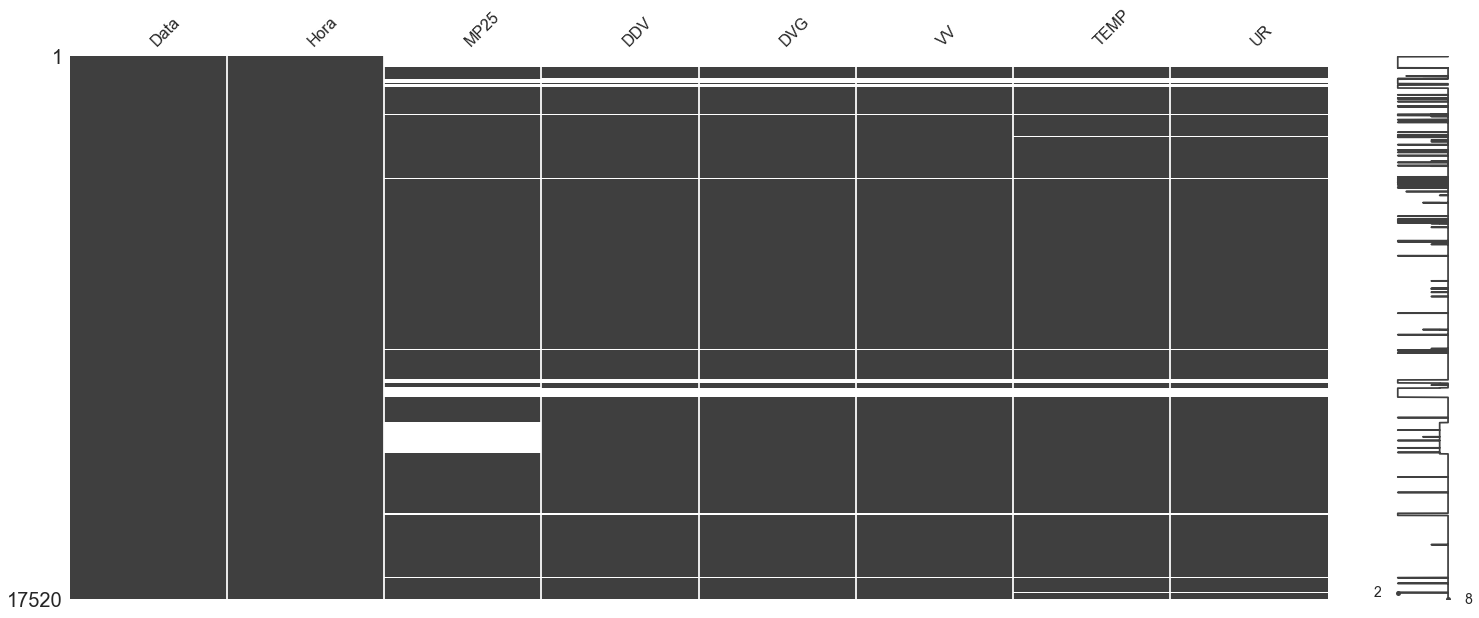

In [202]:
msno.matrix(pdp)

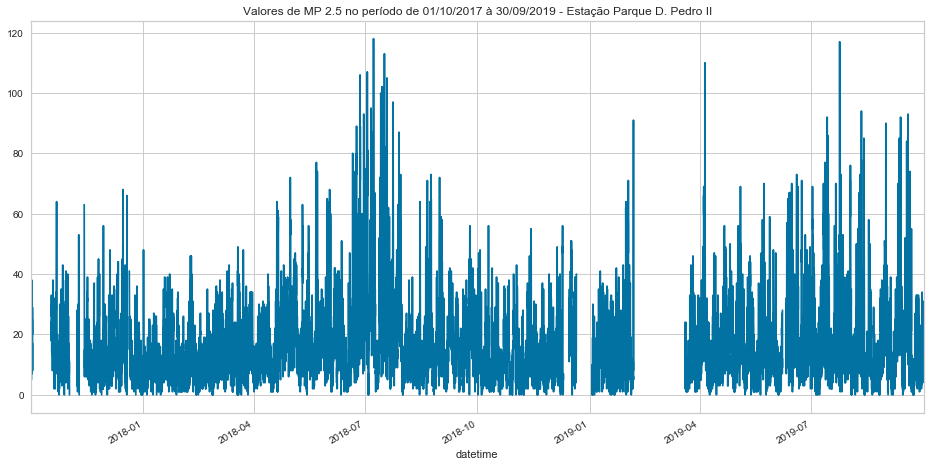

In [203]:
plt.figure(figsize=(16,8))
plt.title('Valores de MP 2.5 no período de 01/10/2017 à 30/09/2019 - Estação Parque D. Pedro II')
pdp.MP25.plot()

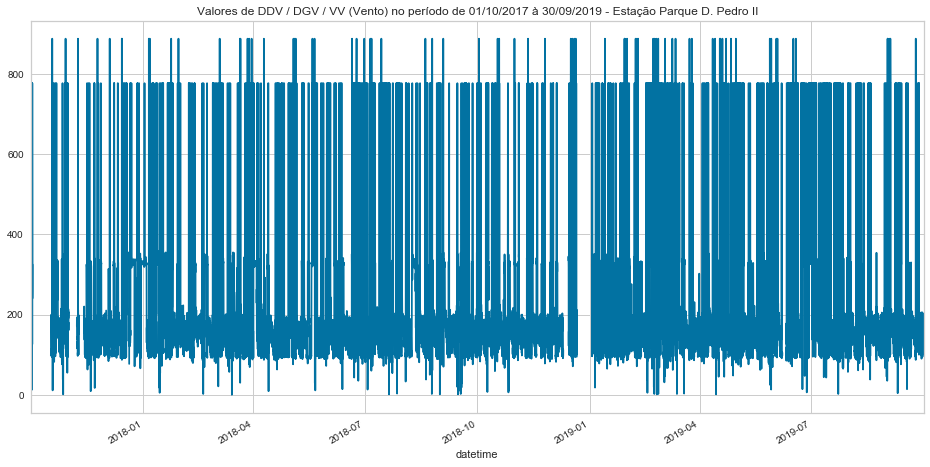

In [204]:
plt.figure(figsize=(16,8))
plt.title('Valores de DDV / DGV / VV (Vento) no período de 01/10/2017 à 30/09/2019 - Estação Parque D. Pedro II')
pdp.DDV.plot()

In [205]:
pdp.DDV.value_counts(dropna=False, normalize=True).head()

777.0    0.109874
NaN      0.073116
328.0    0.016724
97.0     0.015468
329.0    0.015068
Name: DDV, dtype: float64

In [206]:
pdp.loc[pdp.DDV == 777, 'DDV'] = np.nan
pdp.loc[pdp.DDV == 888, 'DDV'] = np.nan

#pdp.replace(777.0, value=np.nan, inplace=True)
#pdp.replace(888.0, value=np.nan, inplace=True)

In [207]:
pdp.DDV.value_counts(dropna=False, normalize=True).head()

NaN      0.187671
328.0    0.016724
97.0     0.015468
329.0    0.015068
327.0    0.014897
Name: DDV, dtype: float64

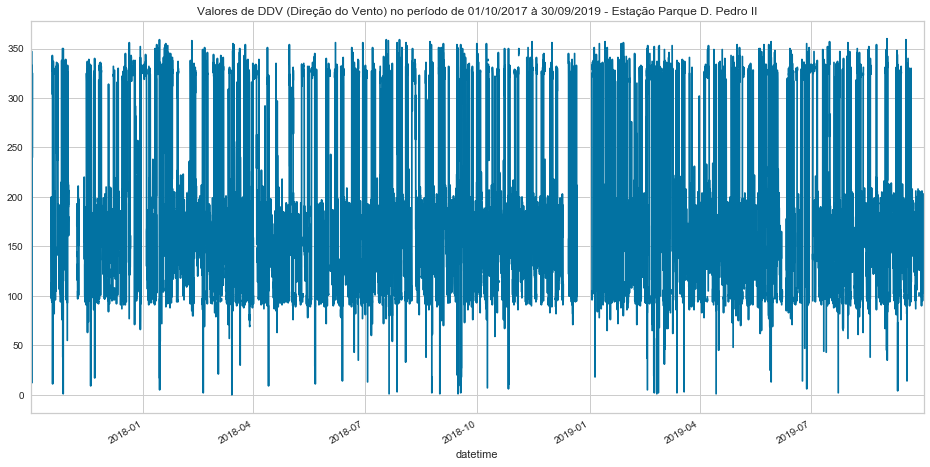

In [210]:
plt.figure(figsize=(16,8))
plt.title('Valores de DDV (Direção do Vento) no período de 01/10/2017 à 30/09/2019 - Estação Parque D. Pedro II')
pdp.DDV.plot()

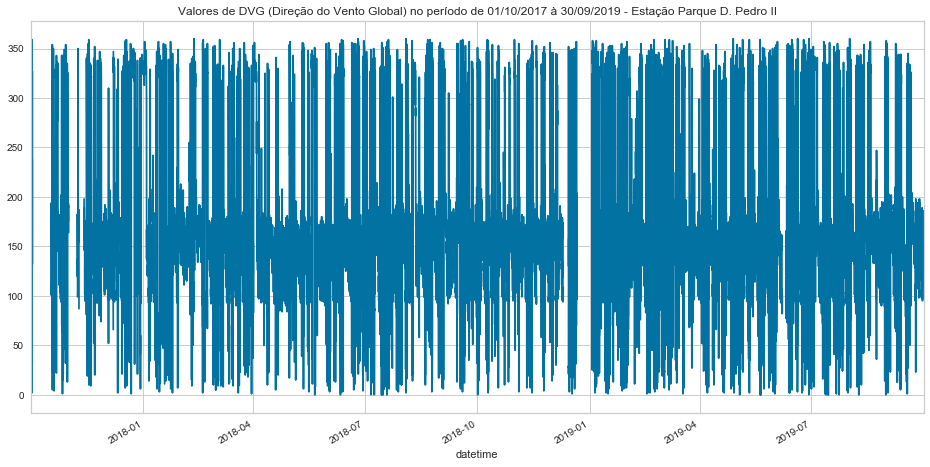

In [211]:
plt.figure(figsize=(16,8))
plt.title('Valores de DVG (Direção do Vento Global) no período de 01/10/2017 à 30/09/2019 - Estação Parque D. Pedro II')
pdp.DVG.plot()

In [212]:
pdp.DVG.value_counts(dropna=False, normalize=True).head()

NaN     0.073116
97.0    0.013756
96.0    0.013756
99.0    0.012443
95.0    0.011929
Name: DVG, dtype: float64

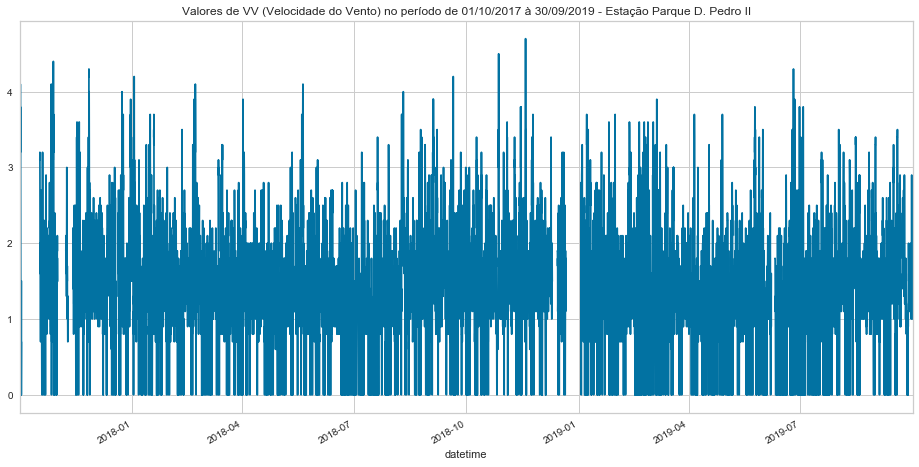

In [213]:
plt.figure(figsize=(16,8))
plt.title('Valores de VV (Velocidade do Vento) no período de 01/10/2017 à 30/09/2019 - Estação Parque D. Pedro II')
pdp.VV.plot()

In [214]:
pdp.VV.value_counts(dropna=False, normalize=True).head(20)

0.0    0.109874
NaN    0.073116
1.3    0.068436
1.2    0.064612
1.5    0.062329
1.4    0.061758
1.1    0.061587
1.6    0.056906
1.0    0.052055
1.7    0.049943
0.9    0.046747
1.8    0.043893
1.9    0.034361
0.8    0.034132
2.0    0.027283
2.1    0.024600
2.2    0.019007
0.7    0.018322
2.3    0.014498
2.4    0.012671
Name: VV, dtype: float64

In [215]:
pdp.loc[pdp.VV == 0, 'VV'] = np.nan

In [216]:
pdp.VV.value_counts(dropna=False, normalize=True).head()

NaN    0.182991
1.3    0.068436
1.2    0.064612
1.5    0.062329
1.4    0.061758
Name: VV, dtype: float64

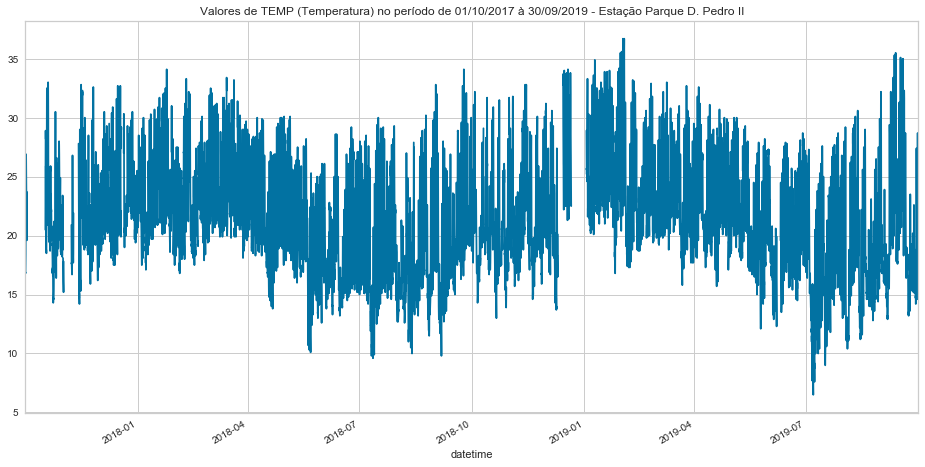

In [217]:
plt.figure(figsize=(16,8))
plt.title('Valores de TEMP (Temperatura) no período de 01/10/2017 à 30/09/2019 - Estação Parque D. Pedro II')
pdp.TEMP.plot()

In [218]:
pdp.TEMP.value_counts(dropna=False, normalize=True).head()

NaN     0.075228
20.4    0.010502
20.8    0.010160
20.3    0.009989
21.1    0.009703
Name: TEMP, dtype: float64

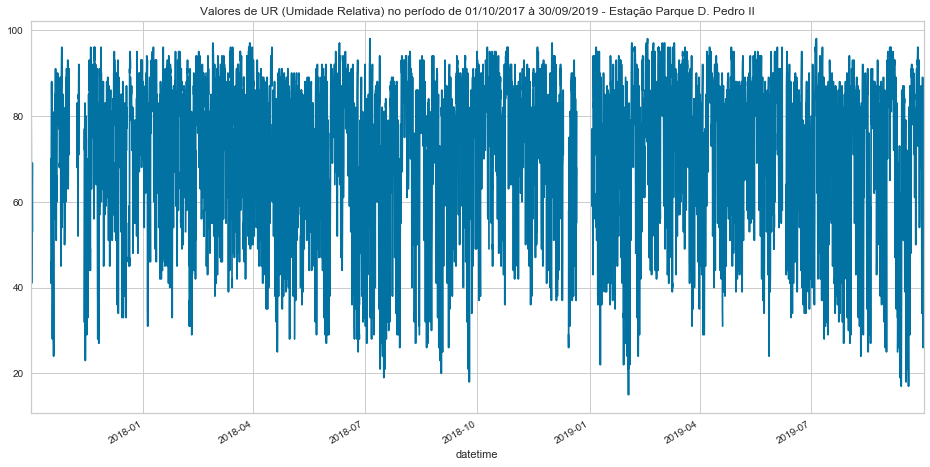

In [219]:
plt.figure(figsize=(16,8))
plt.title('Valores de UR (Umidade Relativa) no período de 01/10/2017 à 30/09/2019 - Estação Parque D. Pedro II')
pdp.UR.plot()

In [220]:
pdp.UR.value_counts(dropna=False, normalize=True).head()

NaN     0.075228
83.0    0.034989
84.0    0.034361
85.0    0.033847
86.0    0.032820
Name: UR, dtype: float64

## Preenchendo os dados faltantes com a média móvel

In [221]:
pdp.MP25.fillna(value=pdp.MP25.rolling(1008, min_periods=1,).mean(), inplace=True)
pdp.DDV.fillna(value=pdp.DDV.rolling(365, min_periods=1,).mean(), inplace=True)
pdp.DVG.fillna(value=pdp.DVG.rolling(365, min_periods=1,).mean(), inplace=True)
pdp.VV.fillna(value=pdp.VV.rolling(365, min_periods=1,).mean(), inplace=True)
pdp.TEMP.fillna(value=pdp.TEMP.rolling(365, min_periods=1,).mean(), inplace=True)
pdp.UR.fillna(value=pdp.UR.rolling(365, min_periods=1,).mean(), inplace=True)

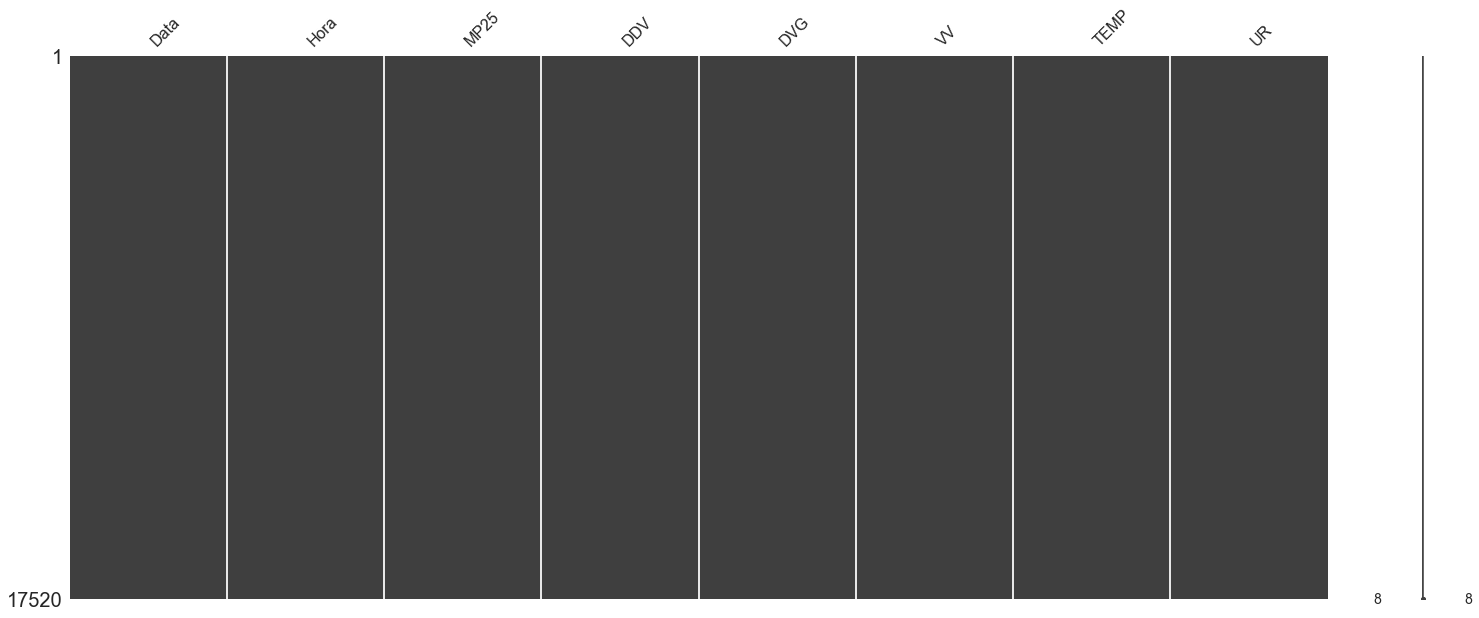

In [222]:
msno.matrix(pdp)

In [223]:
pdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-10-01 01:00:00 to 2019-09-30 23:59:00
Data columns (total 8 columns):
Data    17520 non-null object
Hora    17520 non-null object
MP25    17520 non-null float64
DDV     17520 non-null float64
DVG     17520 non-null float64
VV      17520 non-null float64
TEMP    17520 non-null float64
UR      17520 non-null float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


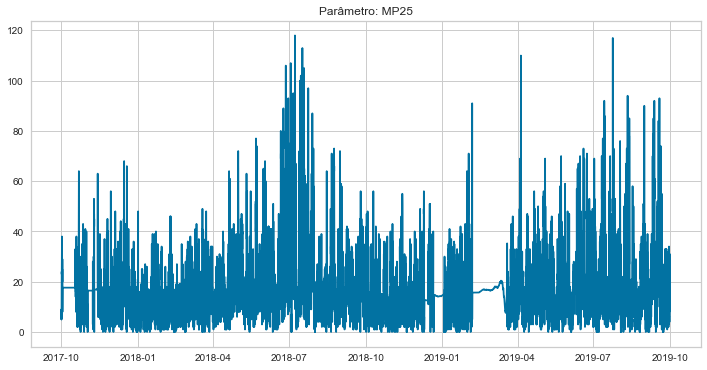

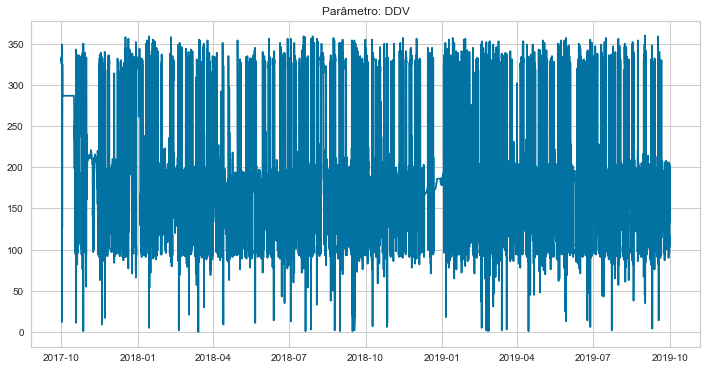

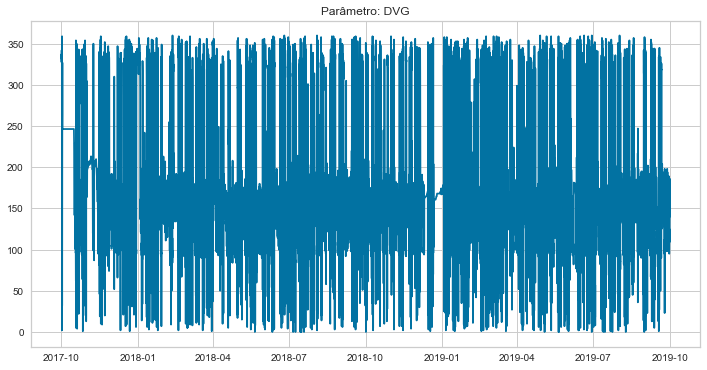

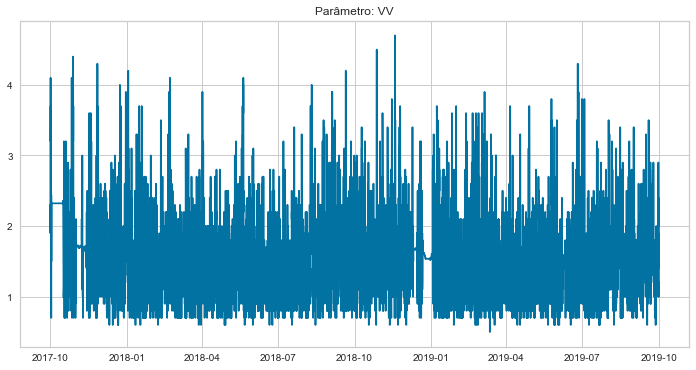

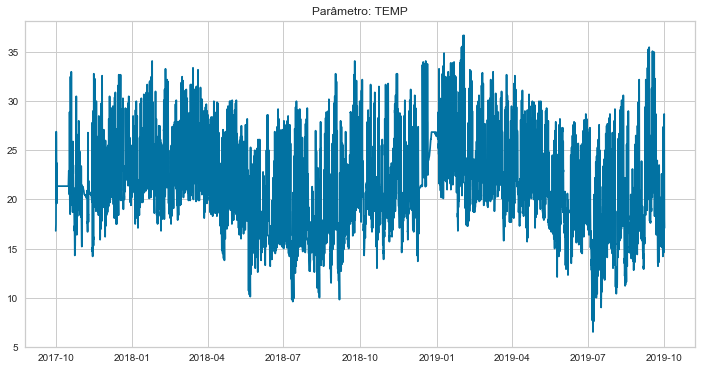

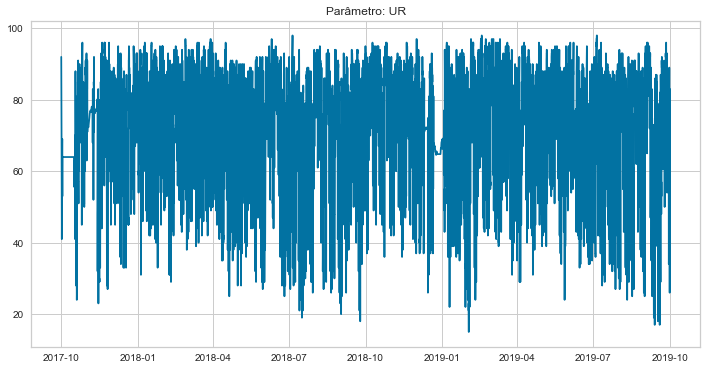

In [225]:
for p in list(pdp.drop(['Data','Hora'],axis=1)):
    plt.figure(figsize=(12,6))
    plt.title('Parâmetro: '+str(p))
    plt.plot(pdp[p])
    plt.grid(True)
    plt.show()

# Estatísticas das variváveis

**Teste de Normalidade das variáveis**

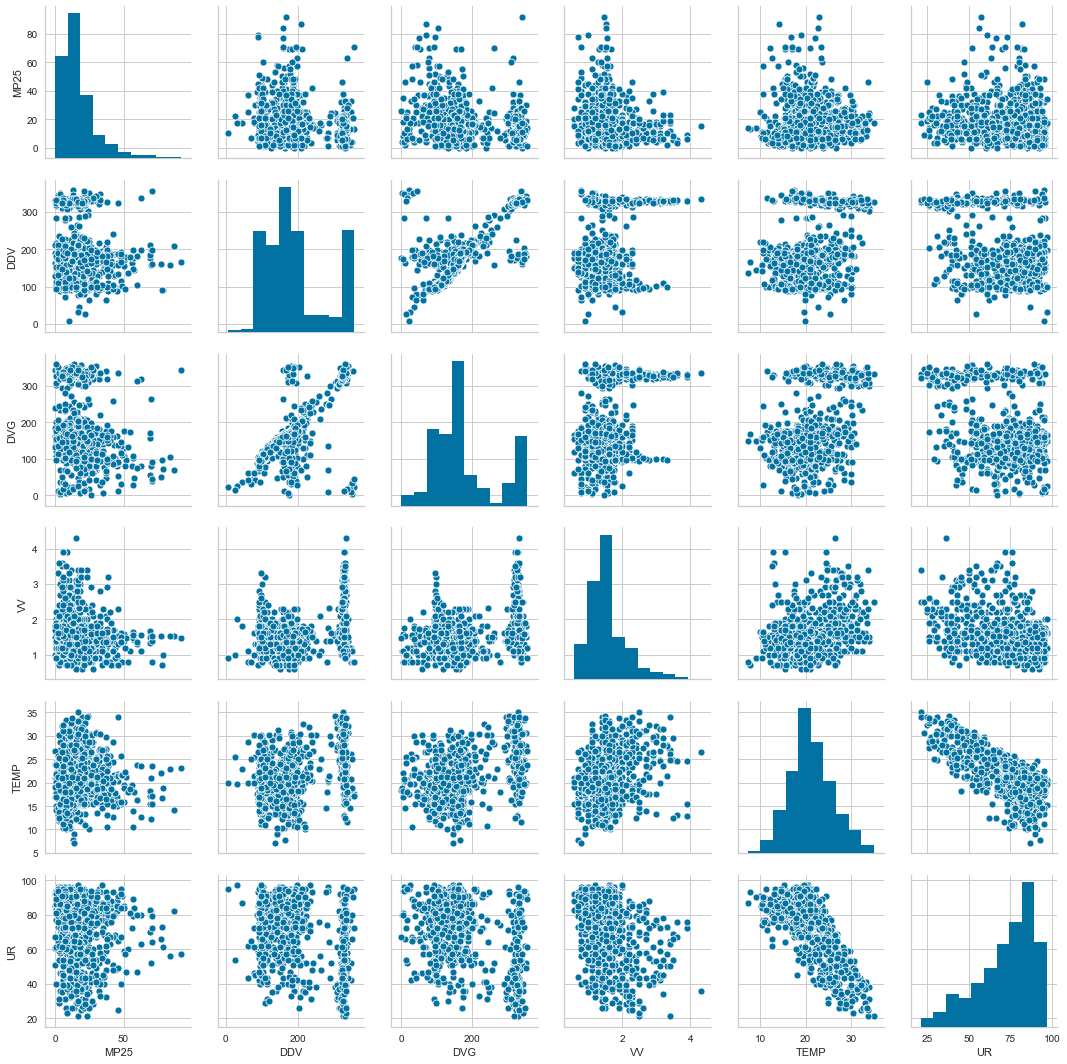

In [226]:
sns.pairplot(pdp.drop(['Data','Hora'],axis=1).sample(1000));

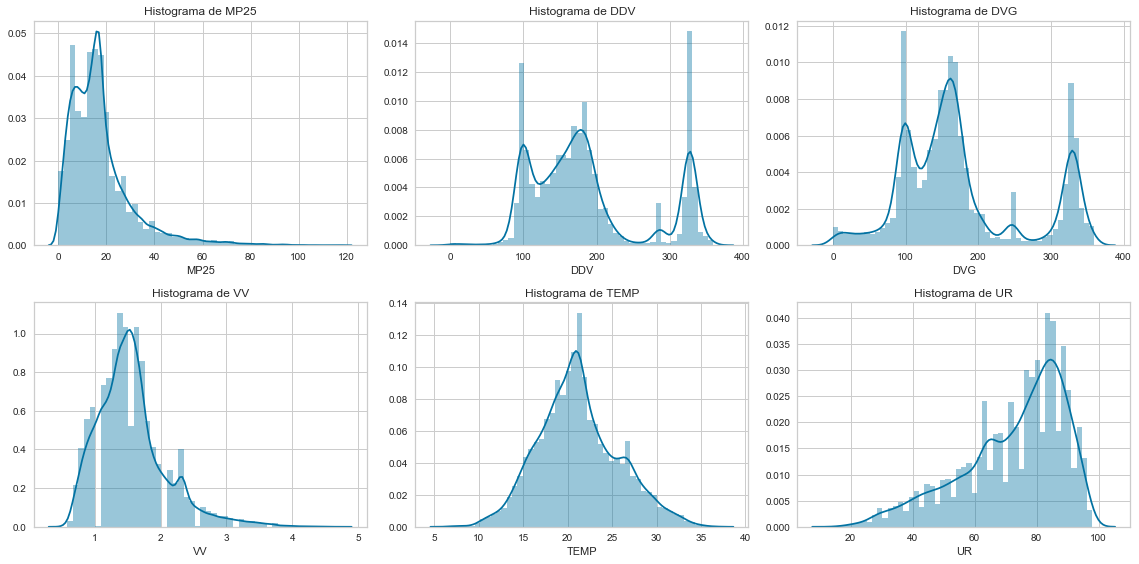

In [227]:
plt.figure(figsize=(16,8))

for i, j in enumerate(pdp.drop(['Data','Hora'],axis=1)):
    plt.subplot(2, 3, i + 1)
    ax = plt.title('Histograma de '+str(j))
    sns.distplot(pdp[j])

plt.tight_layout();

In [228]:
from scipy.stats import kstest, ks_2samp

params = list(pdp.drop(['Data','Hora'],axis=1))

print("Teste de Normalidade de Kolgomorov-Smirnov")
print()

for p in params:
    print(p,':', kstest(pdp[p], 'norm', alternative = 'less'))    

Teste de Normalidade de Kolgomorov-Smirnov

MP25 : KstestResult(statistic=0.9573259010551279, pvalue=0.0)
DDV : KstestResult(statistic=0.9990550867490344, pvalue=0.0)
DVG : KstestResult(statistic=0.9960299725937833, pvalue=0.0)
VV : KstestResult(statistic=0.7673683457088408, pvalue=0.0)
TEMP : KstestResult(statistic=0.99999999995984, pvalue=0.0)
UR : KstestResult(statistic=1.0, pvalue=0.0)


### Avaliação da sazonalidade por box-plot

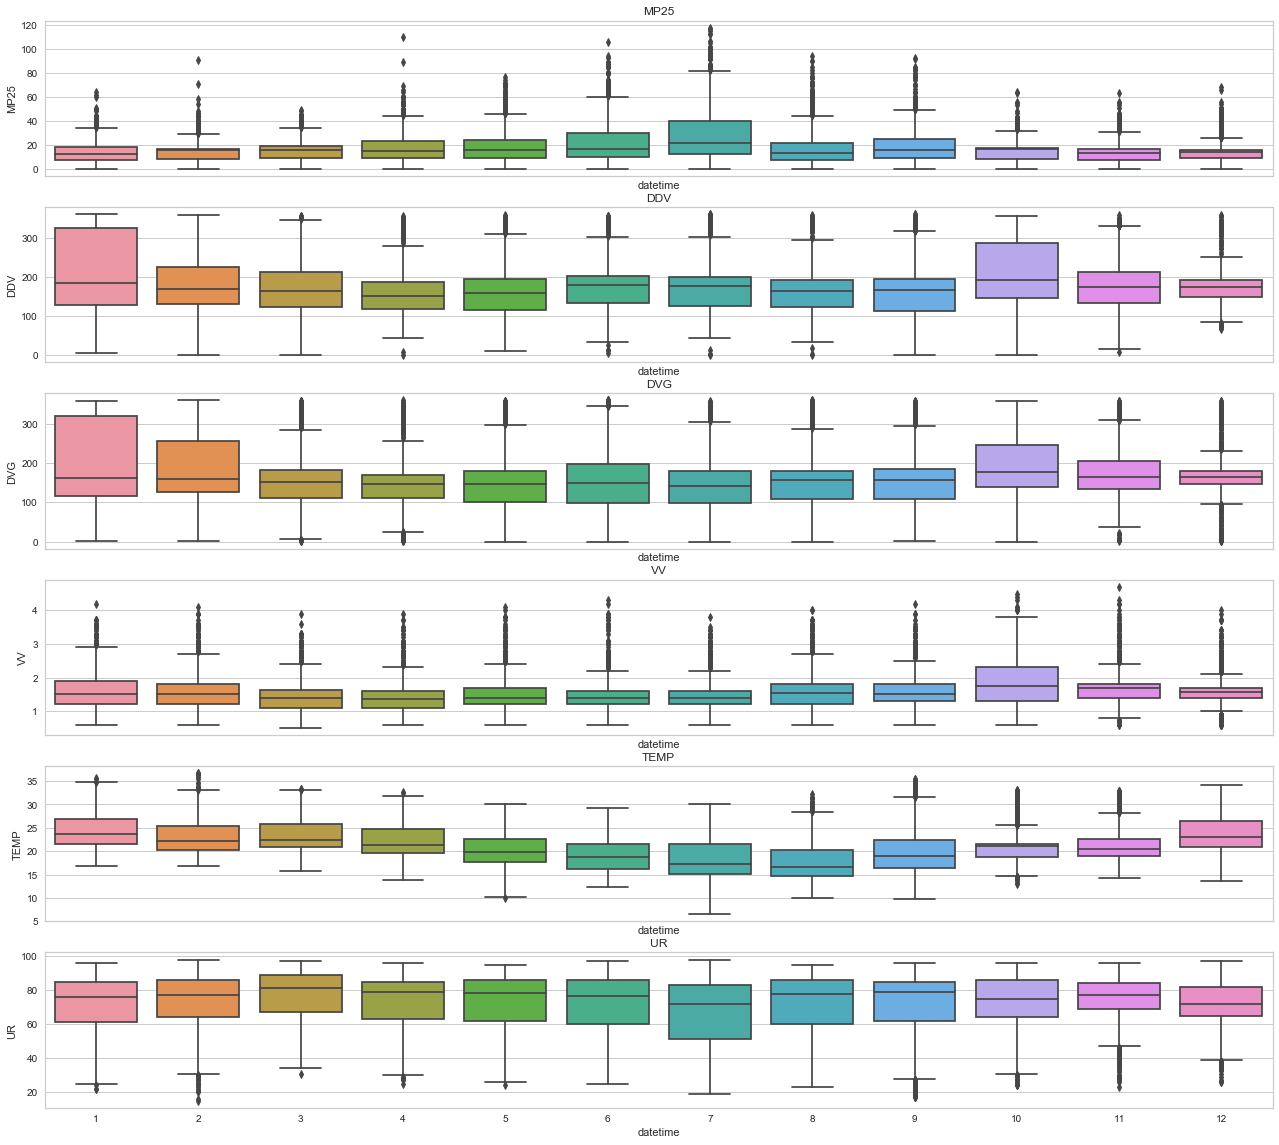

In [229]:

fig, axes = plt.subplots(6, 1, figsize=(22, 20), sharex=True)
for name, ax in zip(['MP25', 'DDV', 'DVG', 'VV', 'TEMP', 'UR'], axes):
    sns.boxplot(data=pdp.drop(['Data','Hora'],axis=1), x=pdp.index.month, y=name, ax=ax)
    #ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

### Matriz de correlação

In [230]:
pdp.drop(['Data','Hora'],axis=1).corr().round(2)['MP25'].sort_values()

DVG    -0.20
VV     -0.11
DDV    -0.10
UR     -0.10
TEMP   -0.01
MP25    1.00
Name: MP25, dtype: float64

In [121]:
from yellowbrick.features import Rank2D

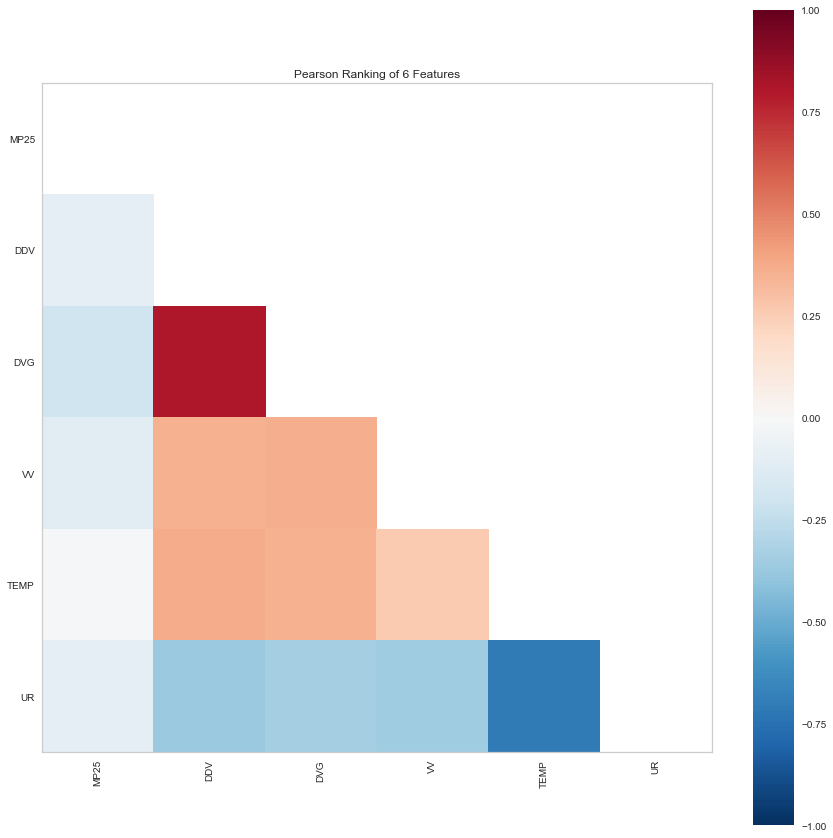

In [231]:
visualizer = Rank2D(algorithm="pearson",  show_feature_names=True, size=(1080, 1080))
visualizer.fit_transform(pdp.drop(['Data','Hora'],axis=1))
visualizer.poof();

### Análise inter quartil (describe)

In [232]:
pdp.drop(['Data','Hora'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
MP25,17520.0,17.365945,13.377098,0.0,8.965278,15.0,21.000000,118.0
DDV,17520.0,186.614527,78.786860,0.0,128.000000,171.0,210.000000,360.0
DVG,17520.0,174.778317,85.277944,0.0,113.000000,158.0,198.115274,360.0
VV,17520.0,1.557954,0.533470,0.5,1.200000,1.5,1.800000,4.7
TEMP,17520.0,21.180477,4.526289,6.5,18.200000,20.9,23.999698,36.7
UR,17520.0,72.605540,16.535835,15.0,63.000000,77.0,85.000000,98.0


### Resample para frequência diária / semanal / média móvel 48h agregando a média

In [233]:
# Resample para frequencia diária agregando a média
pdp_media_diaria = pdp.drop(['Data','Hora'],axis=1).resample('D').mean()
pdp_media_diaria.head()

,MP25,DDV,DVG,VV,TEMP,UR
datetime,,,,,,
2017-10-01,16.375000,293.676587,273.250000,2.607143,21.512500,64.333333
2017-10-02,18.897727,282.054183,219.537879,2.103850,21.196591,63.606061
2017-10-03,17.636364,286.777778,246.393939,2.322222,21.354545,63.969697
2017-10-04,17.636364,286.777778,246.393939,2.322222,21.354545,63.969697
2017-10-05,17.636364,286.777778,246.393939,2.322222,21.354545,63.969697


In [130]:
# Resample para frequencia semanal agregando a média
pdp_media_semanal = pdp.drop(['Data','Hora'],axis=1).resample('W').mean()
pdp_media_semanal.head()

,MP25,DDV,DVG,VV,TEMP,UR
datetime,,,,,,
2017-10-01,16.375000,293.676587,273.250000,2.607143,21.512500,64.333333
2017-10-08,17.816558,286.102979,242.557359,2.291026,21.331981,63.917749
2017-10-15,17.636364,286.777778,246.393939,2.322222,21.354545,63.969697
2017-10-22,19.506845,214.174516,197.282203,1.758783,22.958627,62.833738
2017-10-29,14.065476,211.014534,204.515582,1.805625,20.405246,75.900955


In [248]:
# Resample para media móvel para 48 horas semana agregando a média
pdp_media_movel_hor = pdp.drop(['Data','Hora'],axis=1).rolling(96, center=True).mean()
pdp_media_movel_hor.head()

,MP25,DDV,DVG,VV,TEMP,UR
datetime,,,,,,
2017-10-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN


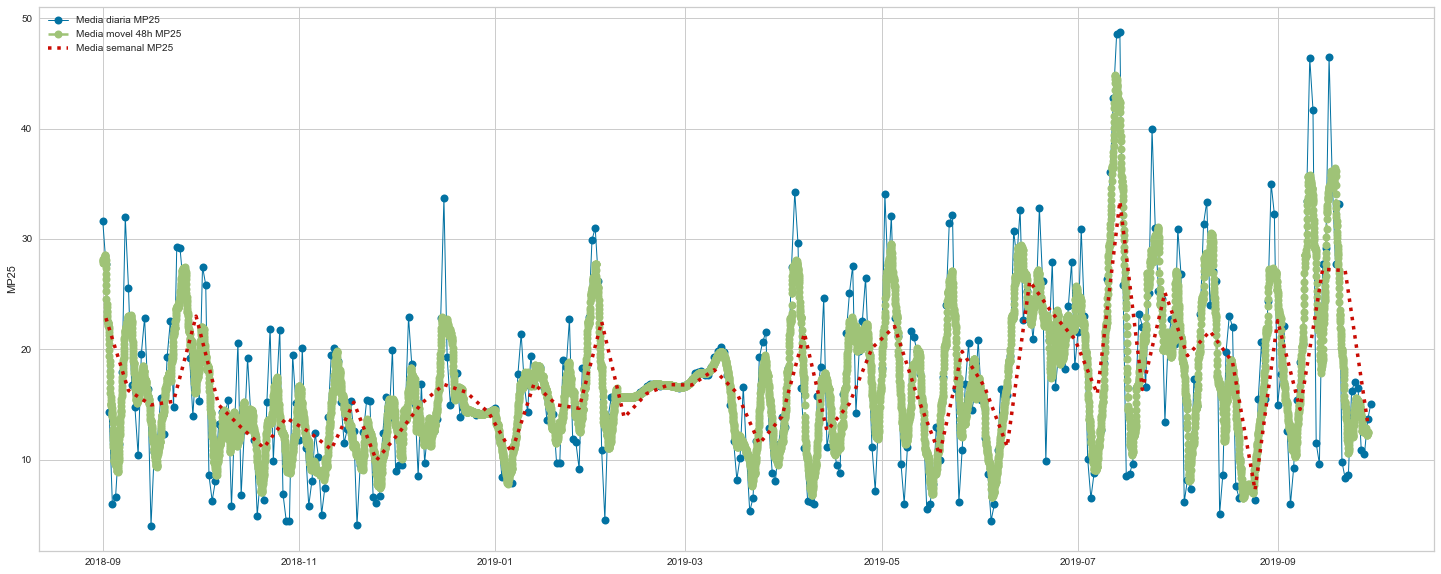

In [284]:
# Janela de observação
start, end = '2018-09', '2019-09'
# Plot da média diária vs. plot média semanal MP25
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(pdp_media_diaria.loc[start:end, 'MP25'], #plot diário
marker='o', markersize=8, linestyle='-',  linewidth=1.0, label='Media diaria MP25')
ax.plot(pdp_media_movel_hor.loc[start:end, 'MP25'],
marker='o', markersize=8, linestyle='--', linewidth=2.5, label='Media movel 48h MP25')
ax.plot(pdp_media_semanal.loc[start:end, 'MP25'],
marker='x', markersize=8, linestyle=':', linewidth=3.5, label='Media semanal MP25')
ax.set_ylabel('MP25')
ax.legend();

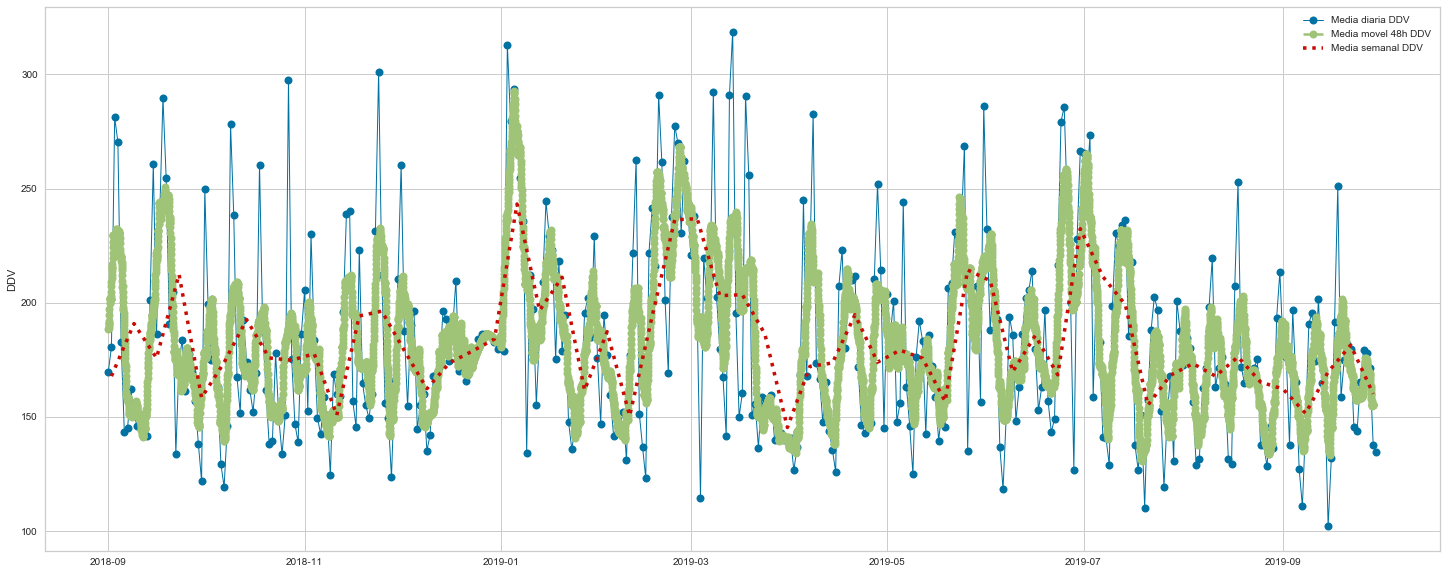

In [288]:
# Janela de observação
start, end = '2018-09', '2019-09'
# Plot da média diária vs. plot média semanal DDV
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(pdp_media_diaria.loc[start:end, 'DDV'], #plot diário
marker='o', markersize=8, linestyle='-',  linewidth=1.0, label='Media diaria DDV')
ax.plot(pdp_media_movel_hor.loc[start:end, 'DDV'],
marker='o', markersize=8, linestyle='--', linewidth=2.5, label='Media movel 48h DDV')
ax.plot(pdp_media_semanal.loc[start:end, 'DDV'],
marker='x', markersize=8, linestyle=':', linewidth=3.5, label='Media semanal DDV')
ax.set_ylabel('DDV')
ax.legend();

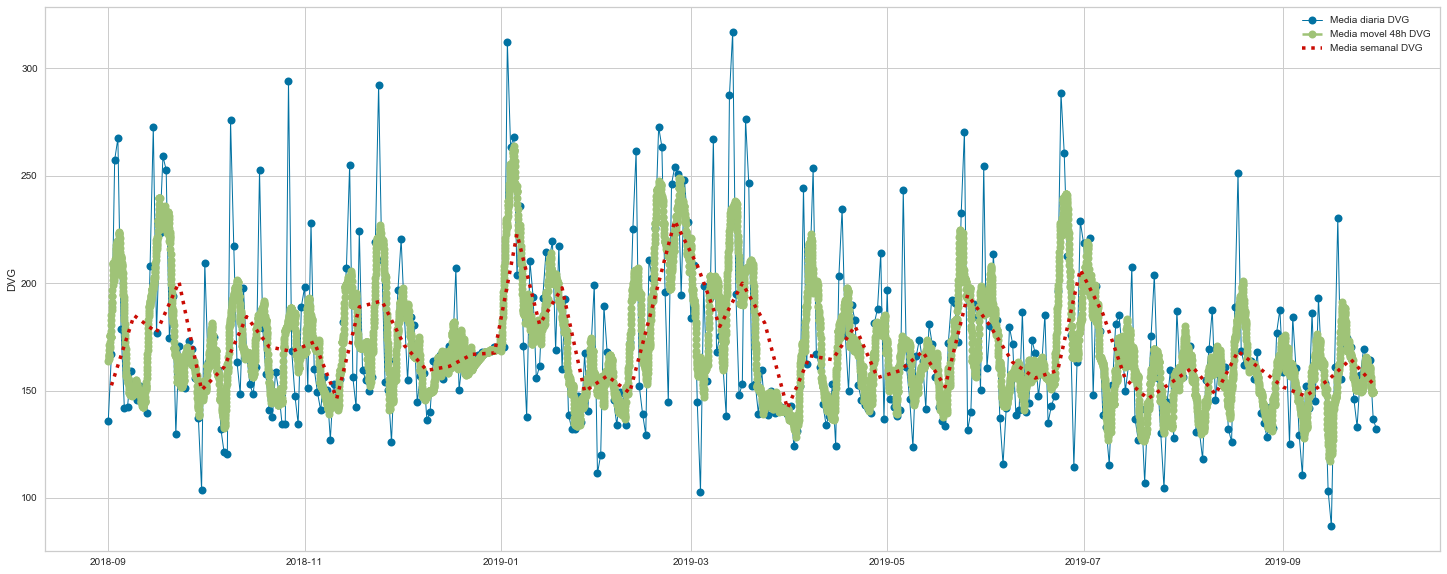

In [289]:
# Janela de observação
start, end = '2018-09', '2019-09'
# Plot da média diária vs. plot média semanal DVG
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(pdp_media_diaria.loc[start:end, 'DVG'], #plot diário
marker='o', markersize=8, linestyle='-',  linewidth=1.0, label='Media diaria DVG')
ax.plot(pdp_media_movel_hor.loc[start:end, 'DVG'],
marker='o', markersize=8, linestyle='--', linewidth=2.5, label='Media movel 48h DVG')
ax.plot(pdp_media_semanal.loc[start:end, 'DVG'],
marker='x', markersize=8, linestyle=':', linewidth=3.5, label='Media semanal DVG')
ax.set_ylabel('DVG')
ax.legend();

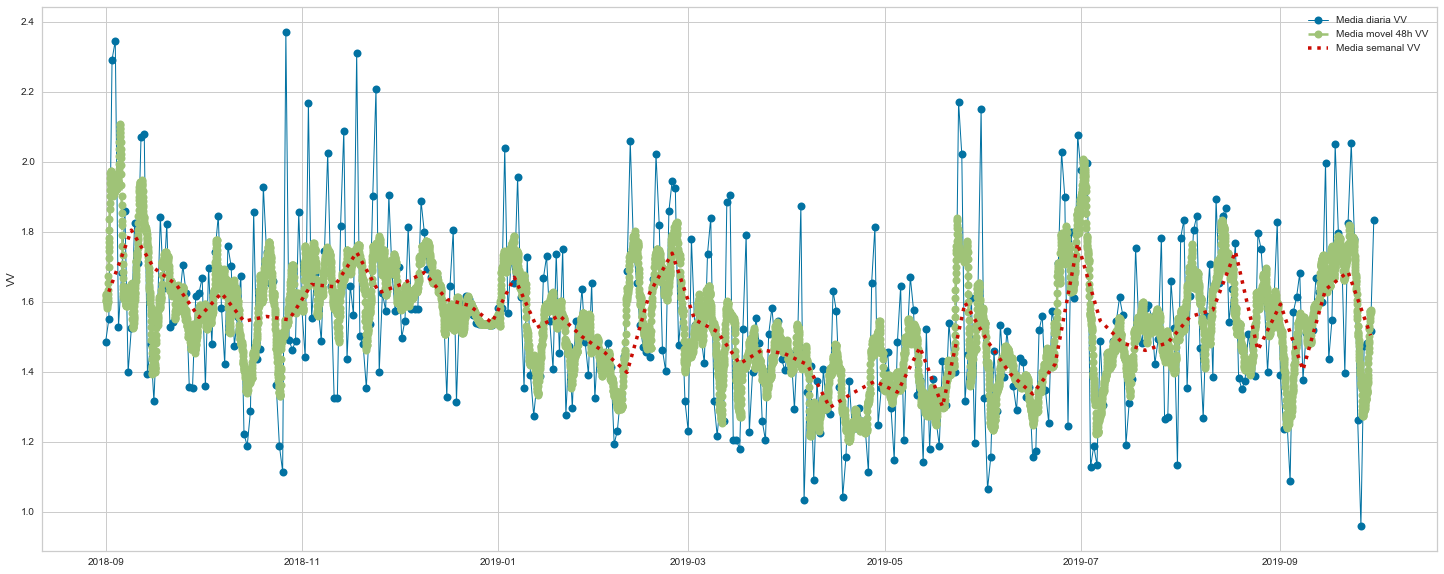

In [290]:
# Janela de observação
start, end = '2018-09', '2019-09'
# Plot da média diária vs. plot média semanal VV
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(pdp_media_diaria.loc[start:end, 'VV'], #plot diário
marker='o', markersize=8, linestyle='-',  linewidth=1.0, label='Media diaria VV')
ax.plot(pdp_media_movel_hor.loc[start:end, 'VV'],
marker='o', markersize=8, linestyle='--', linewidth=2.5, label='Media movel 48h VV')
ax.plot(pdp_media_semanal.loc[start:end, 'VV'],
marker='x', markersize=8, linestyle=':', linewidth=3.5, label='Media semanal VV')
ax.set_ylabel('VV')
ax.legend();

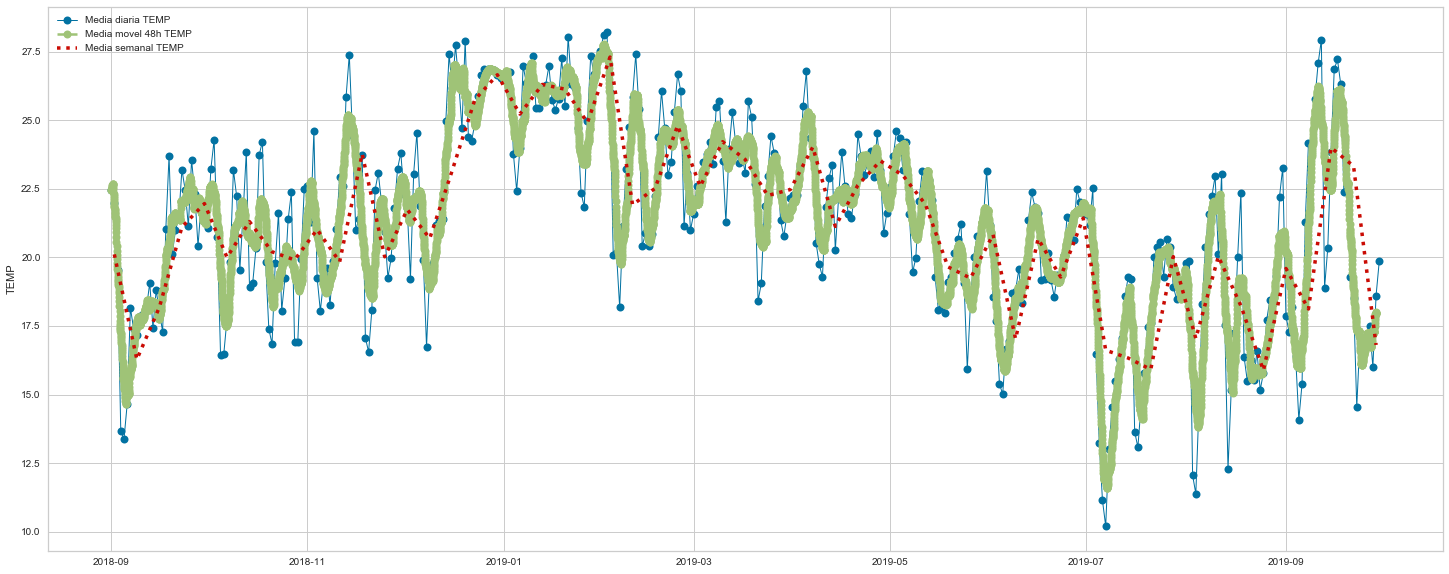

In [291]:
# Janela de observação
start, end = '2018-09', '2019-09'
# Plot da média diária vs. plot média semanal TEMP
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(pdp_media_diaria.loc[start:end, 'TEMP'], #plot diário
marker='o', markersize=8, linestyle='-',  linewidth=1.0, label='Media diaria TEMP')
ax.plot(pdp_media_movel_hor.loc[start:end, 'TEMP'],
marker='o', markersize=8, linestyle='--', linewidth=2.5, label='Media movel 48h TEMP')
ax.plot(pdp_media_semanal.loc[start:end, 'TEMP'],
marker='x', markersize=8, linestyle=':', linewidth=3.5, label='Media semanal TEMP')
ax.set_ylabel('TEMP')
ax.legend();

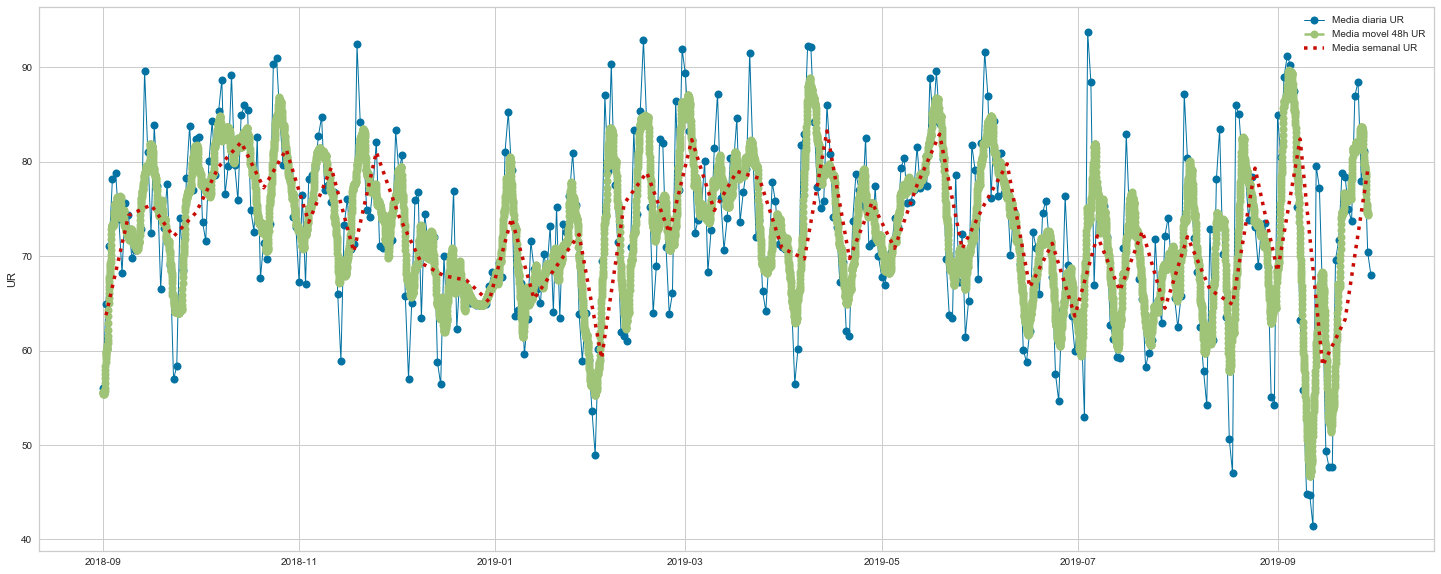

In [292]:
# Janela de observação
start, end = '2018-09', '2019-09'
# Plot da média diária vs. plot média semanal UR
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(pdp_media_diaria.loc[start:end, 'UR'], #plot diário
marker='o', markersize=8, linestyle='-',  linewidth=1.0, label='Media diaria UR')
ax.plot(pdp_media_movel_hor.loc[start:end, 'UR'],
marker='o', markersize=8, linestyle='--', linewidth=2.5, label='Media movel 48h UR')
ax.plot(pdp_media_semanal.loc[start:end, 'UR'],
marker='x', markersize=8, linestyle=':', linewidth=3.5, label='Media semanal UR')
ax.set_ylabel('UR')
ax.legend();

### Analisando a direção dos ventos

In [408]:
from windrose import WindroseAxes
import matplotlib.cm as cm

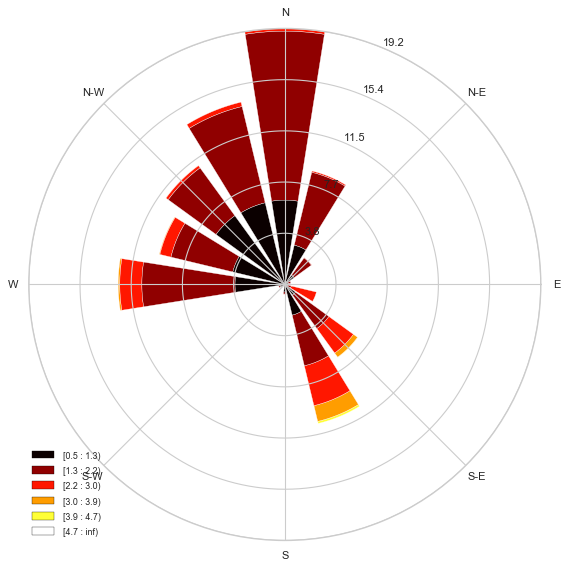

In [177]:
wd = pdp.loc[start:end,'DDV']
ws = pdp.loc[start:end,'VV']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, cmap=cm.hot, blowto=True, normed=True, opening=0.8, edgecolor='white')
ax.set_legend();

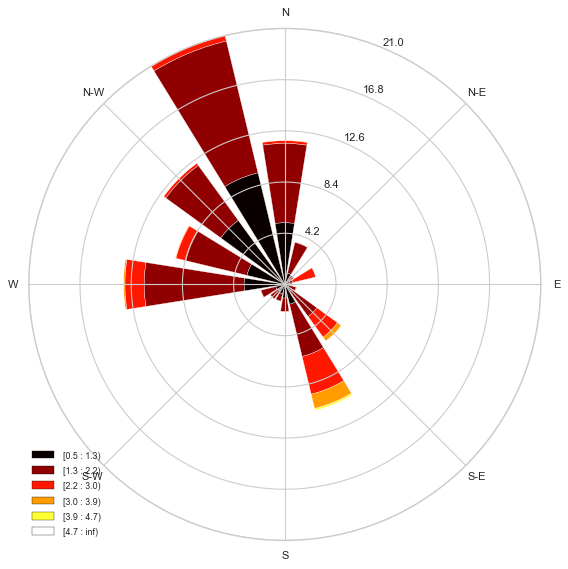

In [178]:
wd = pdp.loc[start:end,'DVG']
ws = pdp.loc[start:end,'VV']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, cmap=cm.hot, blowto=True, normed=True, opening=0.8, edgecolor='white')
ax.set_legend();

**Feature Engineering**

In [293]:
pdp['QUARTER'] = pd.DatetimeIndex(pdp.index).quarter
pdp['MONTH'] = pd.DatetimeIndex(pdp.index).month
pdp['VACATION'] = ((pdp['MONTH'] == 1) | (pdp['MONTH'] == 7) | (pdp['MONTH'] == 12)).astype(int)
pdp['WEEKDAY_NAME'] = pd.DatetimeIndex(pdp.index).day_name()
pdp['WEEKDAY'] = pd.DatetimeIndex(pdp.index).weekday
pdp['IS_WEEKEND'] = (pdp['WEEKDAY'] // 5 == 1).astype(int)

In [294]:
pdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-10-01 01:00:00 to 2019-09-30 23:59:00
Data columns (total 14 columns):
Data            17520 non-null object
Hora            17520 non-null object
MP25            17520 non-null float64
DDV             17520 non-null float64
DVG             17520 non-null float64
VV              17520 non-null float64
TEMP            17520 non-null float64
UR              17520 non-null float64
QUARTER         17520 non-null int64
MONTH           17520 non-null int64
VACATION        17520 non-null int64
WEEKDAY_NAME    17520 non-null object
WEEKDAY         17520 non-null int64
IS_WEEKEND      17520 non-null int64
dtypes: float64(6), int64(5), object(3)
memory usage: 2.6+ MB


In [295]:
pdp.head()

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR,QUARTER,MONTH,VACATION,WEEKDAY_NAME,WEEKDAY,IS_WEEKEND
datetime,,,,,,,,,,,,,,
2017-10-01 01:00:00,01/10/2017,01:00,5.0,326.0,328.0,2.1,16.8,92.0,4,10,0,Sunday,6,1
2017-10-01 02:00:00,01/10/2017,02:00,9.0,331.0,332.0,2.3,16.9,90.0,4,10,0,Sunday,6,1
2017-10-01 03:00:00,01/10/2017,03:00,7.0,333.0,337.0,2.1,16.8,89.0,4,10,0,Sunday,6,1
2017-10-01 04:00:00,01/10/2017,04:00,5.0,329.0,334.0,1.9,16.8,88.0,4,10,0,Sunday,6,1
2017-10-01 05:00:00,01/10/2017,05:00,5.0,332.0,332.0,2.4,17.2,85.0,4,10,0,Sunday,6,1


In [296]:
pdp.sample(15)

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR,QUARTER,MONTH,VACATION,WEEKDAY_NAME,WEEKDAY,IS_WEEKEND
datetime,,,,,,,,,,,,,,
2018-08-04 16:00:00,04/08/2018,16:00,12.000000,331.000000,328.000000,1.900000,20.400000,65.000000,3,8,0,Saturday,5,1
2018-03-10 22:00:00,10/03/2018,22:00,12.000000,113.000000,113.000000,1.300000,21.200000,83.000000,1,3,0,Saturday,5,1
2019-08-16 15:00:00,16/08/2019,15:00,17.000000,349.000000,336.000000,1.400000,25.600000,27.000000,3,8,0,Friday,4,0
2018-03-11 02:00:00,11/03/2018,02:00,17.000000,95.000000,99.000000,1.600000,20.700000,87.000000,1,3,0,Sunday,6,1
2018-10-16 05:00:00,16/10/2018,05:00,11.000000,182.359621,173.000000,1.547799,17.300000,95.000000,4,10,0,Tuesday,1,0
2017-11-01 15:00:00,01/11/2017,15:00,16.455696,207.196262,198.390173,1.720743,21.330791,72.324859,4,11,0,Wednesday,2,0
2018-12-21 20:00:00,21/12/2018,20:00,14.548753,171.418033,160.321569,1.616935,23.984127,67.761905,4,12,1,Friday,4,0
2018-10-18 02:00:00,18/10/2018,02:00,37.000000,182.000000,176.000000,0.800000,21.900000,85.000000,4,10,0,Thursday,3,0
2018-12-27 09:00:00,27/12/2018,09:00,14.122830,186.097403,168.036364,1.536709,26.858642,64.790123,4,12,1,Thursday,3,0


In [328]:
pdp['IS_DAY'] = ((pd.DatetimeIndex(pdp.index).hour >= 6 ) & (pd.DatetimeIndex(pdp.index).hour <= 18)).astype(int)
pdp['MANHA']  = ((pd.DatetimeIndex(pdp.index).hour >= 6 ) & (pd.DatetimeIndex(pdp.index).hour <= 12)).astype(int)
pdp['TARDE']  = ((pd.DatetimeIndex(pdp.index).hour >= 13) & (pd.DatetimeIndex(pdp.index).hour <= 18)).astype(int)
pdp['NOITE']  = ((pd.DatetimeIndex(pdp.index).hour >= 19) & (pd.DatetimeIndex(pdp.index).hour <= 23)).astype(int)
pdp.head(24)

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR,QUARTER,MONTH,VACATION,WEEKDAY_NAME,WEEKDAY,IS_WEEKEND,IS_DAY,MANHA,TARDE,NOITE
datetime,,,,,,,,,,,,,,,,,,
2017-10-01 01:00:00,01/10/2017,01:00,5.0,326.000000,328.0,2.100000,16.8,92.0,4,10,0,Sunday,6,1,0,0,0,0
2017-10-01 02:00:00,01/10/2017,02:00,9.0,331.000000,332.0,2.300000,16.9,90.0,4,10,0,Sunday,6,1,0,0,0,0
2017-10-01 03:00:00,01/10/2017,03:00,7.0,333.000000,337.0,2.100000,16.8,89.0,4,10,0,Sunday,6,1,0,0,0,0
2017-10-01 04:00:00,01/10/2017,04:00,5.0,329.000000,334.0,1.900000,16.8,88.0,4,10,0,Sunday,6,1,0,0,0,0
2017-10-01 05:00:00,01/10/2017,05:00,5.0,332.000000,332.0,2.400000,17.2,85.0,4,10,0,Sunday,6,1,0,0,0,0
2017-10-01 06:00:00,01/10/2017,06:00,15.0,333.000000,334.0,2.800000,17.3,85.0,4,10,0,Sunday,6,1,1,1,0,0
2017-10-01 07:00:00,01/10/2017,07:00,15.0,334.000000,334.0,2.700000,17.5,83.0,4,10,0,Sunday,6,1,1,1,0,0
2017-10-01 08:00:00,01/10/2017,08:00,5.0,330.000000,334.0,3.400000,18.4,78.0,4,10,0,Sunday,6,1,1,1,0,0
2017-10-01 09:00:00,01/10/2017,09:00,14.0,330.000000,335.0,3.700000,19.7,71.0,4,10,0,Sunday,6,1,1,1,0,0


In [340]:
pdp['DDV_N']  = ((pdp['DDV'] >=  0) & (pdp['DDV'] <= 45 )).astype(int)
pdp['DDV_NE'] = ((pdp['DDV'] >  45) & (pdp['DDV'] <= 90 )).astype(int)
pdp['DDV_L']  = ((pdp['DDV'] >  90) & (pdp['DDV'] <= 135)).astype(int)
pdp['DDV_SE'] = ((pdp['DDV'] > 135) & (pdp['DDV'] <= 180)).astype(int)
pdp['DDV_S']  = ((pdp['DDV'] > 180) & (pdp['DDV'] <= 225)).astype(int)
pdp['DDV_SO'] = ((pdp['DDV'] > 225) & (pdp['DDV'] <= 270)).astype(int)
pdp['DDV_O']  = ((pdp['DDV'] > 270) & (pdp['DDV'] <= 315)).astype(int)

pdp['DVG_N']  = ((pdp['DVG'] >=  0) & (pdp['DVG'] <= 45 )).astype(int)
pdp['DVG_NE'] = ((pdp['DVG'] >  45) & (pdp['DVG'] <= 90 )).astype(int)
pdp['DVG_L']  = ((pdp['DVG'] >  90) & (pdp['DVG'] <= 135)).astype(int)
pdp['DVG_SE'] = ((pdp['DVG'] > 135) & (pdp['DVG'] <= 180)).astype(int)
pdp['DVG_S']  = ((pdp['DVG'] > 180) & (pdp['DVG'] <= 225)).astype(int)
pdp['DVG_SO'] = ((pdp['DVG'] > 225) & (pdp['DVG'] <= 270)).astype(int)
pdp['DVG_O']  = ((pdp['DVG'] > 270) & (pdp['DVG'] <= 315)).astype(int)

pdp.head(24)

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR,QUARTER,MONTH,VACATION,WEEKDAY_NAME,WEEKDAY,IS_WEEKEND,IS_DAY,MANHA,TARDE,NOITE,DDV_N,DDV_NE,DDV_L,DDV_SE,DDV_S,DDV_SO,DDV_O,DVG_N,DVG_NE,DVG_L,DVG_SE,DVG_S,DVG_SO,DVG_O
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01 01:00:00,01/10/2017,01:00,5.0,326.000000,328.0,2.100000,16.8,92.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 02:00:00,01/10/2017,02:00,9.0,331.000000,332.0,2.300000,16.9,90.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 03:00:00,01/10/2017,03:00,7.0,333.000000,337.0,2.100000,16.8,89.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 04:00:00,01/10/2017,04:00,5.0,329.000000,334.0,1.900000,16.8,88.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 05:00:00,01/10/2017,05:00,5.0,332.000000,332.0,2.400000,17.2,85.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 06:00:00,01/10/2017,06:00,15.0,333.000000,334.0,2.800000,17.3,85.0,4,10,0,Sunday,6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 07:00:00,01/10/2017,07:00,15.0,334.000000,334.0,2.700000,17.5,83.0,4,10,0,Sunday,6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 08:00:00,01/10/2017,08:00,5.0,330.000000,334.0,3.400000,18.4,78.0,4,10,0,Sunday,6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 09:00:00,01/10/2017,09:00,14.0,330.000000,335.0,3.700000,19.7,71.0,4,10,0,Sunday,6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [380]:
pdp['FERIADOS'] =  (pd.DatetimeIndex(pdp.index).day in ('07/09/2017','12/10/2017','02/11/2017','15/11/2017','25/12/2017',
                                                        '01/01/2018','12/02/2018','13/02/2018','30/03/2018','21/04/2018',
                                                        '01/05/2018','31/05/2018','07/09/2018','12/10/2018','02/11/2018',
                                                        '15/11/2018','25/12/2018','01/01/2019','04/03/2019','05/03/2019',
                                                        '19/04/2019','21/04/2019','01/05/2019','20/06/2019','07/09/2019',
                                                        '12/10/2019')) == 1
pdp.head()

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR,QUARTER,MONTH,VACATION,WEEKDAY_NAME,WEEKDAY,IS_WEEKEND,IS_DAY,MANHA,TARDE,NOITE,DDV_N,DDV_NE,DDV_L,DDV_SE,DDV_S,DDV_SO,DDV_O,DVG_N,DVG_NE,DVG_L,DVG_SE,DVG_S,DVG_SO,DVG_O,FERIADOS
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01 01:00:00,01/10/2017,01:00,5.0,326.0,328.0,2.1,16.8,92.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2017-10-01 02:00:00,01/10/2017,02:00,9.0,331.0,332.0,2.3,16.9,90.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2017-10-01 03:00:00,01/10/2017,03:00,7.0,333.0,337.0,2.1,16.8,89.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2017-10-01 04:00:00,01/10/2017,04:00,5.0,329.0,334.0,1.9,16.8,88.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2017-10-01 05:00:00,01/10/2017,05:00,5.0,332.0,332.0,2.4,17.2,85.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


In [381]:
pdp.loc[pdp.FERIADOS == False, 'FERIADOS'] = 0
pdp.head()

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR,QUARTER,MONTH,VACATION,WEEKDAY_NAME,WEEKDAY,IS_WEEKEND,IS_DAY,MANHA,TARDE,NOITE,DDV_N,DDV_NE,DDV_L,DDV_SE,DDV_S,DDV_SO,DDV_O,DVG_N,DVG_NE,DVG_L,DVG_SE,DVG_S,DVG_SO,DVG_O,FERIADOS
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01 01:00:00,01/10/2017,01:00,5.0,326.0,328.0,2.1,16.8,92.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 02:00:00,01/10/2017,02:00,9.0,331.0,332.0,2.3,16.9,90.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 03:00:00,01/10/2017,03:00,7.0,333.0,337.0,2.1,16.8,89.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 04:00:00,01/10/2017,04:00,5.0,329.0,334.0,1.9,16.8,88.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 05:00:00,01/10/2017,05:00,5.0,332.0,332.0,2.4,17.2,85.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [393]:
#Label encoder - Não rodar duas vezes
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
idx = features = pdp.columns.values[2:7]
for feature in features:
    pdp[feature + "_qbinned"] = pd.qcut(pdp.loc[:, feature].values, q=10, labels=False)
    pdp[feature + "_qbinned"] = encoder.fit_transform(pdp[feature + "_qbinned"].values.reshape(-1, 1))    
    pdp[feature + "_rounded"] = np.round(pdp.loc[:, feature].values)
    pdp[feature + "_rounded_10"] = np.round(10*pdp.loc[:, feature].values)
    pdp[feature + "_rounded_100"] = np.round(100*pdp.loc[:, feature].values)
    pdp[feature + "_sum"]  = pdp[idx].sum(axis=1)  
    pdp[feature + "_min"]  = pdp[idx].min(axis=1)
    pdp[feature + "_max"]  = pdp[idx].max(axis=1)
    pdp[feature + "_mean"] = pdp[idx].mean(axis=1)
    pdp[feature + "_std"]  = pdp[idx].std(axis=1)
    pdp[feature + "_skew"] = pdp[idx].skew(axis=1)
    pdp[feature + "_kurt"] = pdp[idx].kurtosis(axis=1)
    pdp[feature + "_med"]  = pdp[idx].median(axis=1)
pdp.head()

In [398]:
pdp['MP25_FREQ']= pdp.groupby('MP25')['MP25'].transform('size')
pdp['DDV_FREQ']= pdp.groupby('DDV')['DDV'].transform('size')
pdp['DVG_FREQ']= pdp.groupby('DVG')['DVG'].transform('size')
pdp['VV_FREQ']= pdp.groupby('VV')['VV'].transform('size')
pdp['TEMP_FREQ']= pdp.groupby('TEMP')['TEMP'].transform('size')
pdp.head()

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR,QUARTER,MONTH,VACATION,WEEKDAY_NAME,WEEKDAY,IS_WEEKEND,IS_DAY,MANHA,TARDE,NOITE,DDV_N,DDV_NE,DDV_L,DDV_SE,DDV_S,DDV_SO,DDV_O,DVG_N,DVG_NE,DVG_L,DVG_SE,DVG_S,DVG_SO,DVG_O,FERIADOS,MP25_qbinned,MP25_rounded,MP25_rounded_10,MP25_rounded_100,MP25_sum,MP25_min,MP25_max,MP25_mean,MP25_std,MP25_skew,MP25_kurt,MP25_med,DDV_qbinned,DDV_rounded,DDV_rounded_10,DDV_rounded_100,DDV_sum,DDV_min,DDV_max,DDV_mean,DDV_std,DDV_skew,DDV_kurt,DDV_med,DVG_qbinned,DVG_rounded,DVG_rounded_10,DVG_rounded_100,DVG_sum,DVG_min,DVG_max,DVG_mean,DVG_std,DVG_skew,DVG_kurt,DVG_med,VV_qbinned,VV_rounded,VV_rounded_10,VV_rounded_100,VV_sum,VV_min,VV_max,VV_mean,VV_std,VV_skew,VV_kurt,VV_med,TEMP_qbinned,TEMP_rounded,TEMP_rounded_10,TEMP_rounded_100,TEMP_sum,TEMP_min,TEMP_max,TEMP_mean,TEMP_std,TEMP_skew,TEMP_kurt,TEMP_med,MP25_FREQ,DDV_FREQ,DVG_FREQ,VV_FREQ,TEMP_FREQ
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01 01:00:00,01/10/2017,01:00,5.0,326.0,328.0,2.1,16.8,92.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,50.0,500.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,8,326.0,3260.0,32600.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,8,328.0,3280.0,32800.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,8,2.0,21.0,210.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,1,17.0,168.0,1680.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,621,258,166,431,93
2017-10-01 02:00:00,01/10/2017,02:00,9.0,331.0,332.0,2.3,16.9,90.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9.0,90.0,900.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,9,331.0,3310.0,33100.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,9,332.0,3320.0,33200.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,8,2.0,23.0,230.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,1,17.0,169.0,1690.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,627,169,141,254,99
2017-10-01 03:00:00,01/10/2017,03:00,7.0,333.0,337.0,2.1,16.8,89.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.0,70.0,700.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,9,333.0,3330.0,33300.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,9,337.0,3370.0,33700.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,8,2.0,21.0,210.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,1,17.0,168.0,1680.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,665,106,74,431,93
2017-10-01 04:00:00,01/10/2017,04:00,5.0,329.0,334.0,1.9,16.8,88.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,50.0,500.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,9,329.0,3290.0,32900.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,9,334.0,3340.0,33400.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,7,2.0,19.0,190.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,1,17.0,168.0,1680.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,621,264,133,602,93
2017-10-01 05:00:00,01/10/2017,05:00,5.0,332.0,332.0,2.4,17.2,85.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,50.0,500.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,9,332.0,3320.0,33200.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,9,332.0,3320.0,33200.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,9,2.0,24.0,240.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,1,17.0,172.0,1720.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,621,161,141,222,92


In [404]:
pdp['IS_OUTONO']    = (((pdp.Data) >= '19/03/2017') & ((pdp.Data) <= '21/06/2017')).astype(int)  
pdp['IS_OUTONO']    = (((pdp.Data) >= '19/03/2018') & ((pdp.Data) <= '21/06/2018')).astype(int)  
pdp['IS_OUTONO']    = (((pdp.Data) >= '19/03/2019') & ((pdp.Data) <= '21/06/2019')).astype(int)
pdp['IS_INVERNO']   = (((pdp.Data) >= '22/06/2017') & ((pdp.Data) <= '22/09/2017')).astype(int)  
pdp['IS_INVERNO']   = (((pdp.Data) >= '22/06/2018') & ((pdp.Data) <= '22/09/2018')).astype(int)  
pdp['IS_INVERNO']   = (((pdp.Data) >= '22/09/2019') & ((pdp.Data) <= '22/09/2019')).astype(int)
pdp['IS_PRIMAVERA'] = (((pdp.Data) >= '23/09/2017') & ((pdp.Data) <= '21/12/2017')).astype(int)
pdp['IS_PRIMAVERA'] = (((pdp.Data) >= '23/09/2018') & ((pdp.Data) <= '21/12/2018')).astype(int)
pdp['IS_PRIMAVERA'] = (((pdp.Data) >= '23/09/2019') & ((pdp.Data) <= '21/12/2019')).astype(int)

pdp.head()

,Data,Hora,MP25,DDV,DVG,VV,TEMP,UR,QUARTER,MONTH,VACATION,WEEKDAY_NAME,WEEKDAY,IS_WEEKEND,IS_DAY,MANHA,TARDE,NOITE,DDV_N,DDV_NE,DDV_L,DDV_SE,DDV_S,DDV_SO,DDV_O,DVG_N,DVG_NE,DVG_L,DVG_SE,DVG_S,DVG_SO,DVG_O,FERIADOS,MP25_qbinned,MP25_rounded,MP25_rounded_10,MP25_rounded_100,MP25_sum,MP25_min,MP25_max,MP25_mean,MP25_std,MP25_skew,MP25_kurt,MP25_med,DDV_qbinned,DDV_rounded,DDV_rounded_10,DDV_rounded_100,DDV_sum,DDV_min,DDV_max,DDV_mean,DDV_std,DDV_skew,DDV_kurt,DDV_med,DVG_qbinned,DVG_rounded,DVG_rounded_10,DVG_rounded_100,DVG_sum,DVG_min,DVG_max,DVG_mean,DVG_std,DVG_skew,DVG_kurt,DVG_med,VV_qbinned,VV_rounded,VV_rounded_10,VV_rounded_100,VV_sum,VV_min,VV_max,VV_mean,VV_std,VV_skew,VV_kurt,VV_med,TEMP_qbinned,TEMP_rounded,TEMP_rounded_10,TEMP_rounded_100,TEMP_sum,TEMP_min,TEMP_max,TEMP_mean,TEMP_std,TEMP_skew,TEMP_kurt,TEMP_med,MP25_FREQ,DDV_FREQ,DVG_FREQ,VV_FREQ,TEMP_FREQ,IS_OUTONO,IS_INVERNO,IS_PRIMAVERA
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01 01:00:00,01/10/2017,01:00,5.0,326.0,328.0,2.1,16.8,92.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,50.0,500.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,8,326.0,3260.0,32600.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,8,328.0,3280.0,32800.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,8,2.0,21.0,210.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,1,17.0,168.0,1680.0,677.9,2.1,328.0,135.58,174.829894,0.604167,-3.326603,16.8,621,258,166,431,93,0,0,0
2017-10-01 02:00:00,01/10/2017,02:00,9.0,331.0,332.0,2.3,16.9,90.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9.0,90.0,900.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,9,331.0,3310.0,33100.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,9,332.0,3320.0,33200.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,8,2.0,23.0,230.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,1,17.0,169.0,1690.0,691.2,2.3,332.0,138.24,176.497459,0.604692,-3.327555,16.9,627,169,141,254,99,0,0,0
2017-10-01 03:00:00,01/10/2017,03:00,7.0,333.0,337.0,2.1,16.8,89.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.0,70.0,700.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,9,333.0,3330.0,33300.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,9,337.0,3370.0,33700.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,8,2.0,21.0,210.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,1,17.0,168.0,1680.0,695.9,2.1,337.0,139.18,178.842310,0.604889,-3.325998,16.8,665,106,74,431,93,0,0,0
2017-10-01 04:00:00,01/10/2017,04:00,5.0,329.0,334.0,1.9,16.8,88.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,50.0,500.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,9,329.0,3290.0,32900.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,9,334.0,3340.0,33400.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,7,2.0,19.0,190.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,1,17.0,168.0,1680.0,686.7,1.9,334.0,137.34,177.338992,0.604585,-3.324442,16.8,621,264,133,602,93,0,0,0
2017-10-01 05:00:00,01/10/2017,05:00,5.0,332.0,332.0,2.4,17.2,85.0,4,10,0,Sunday,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,50.0,500.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,9,332.0,3320.0,33200.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,9,332.0,3320.0,33200.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,9,2.0,24.0,240.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,1,17.0,172.0,1720.0,688.6,2.4,332.0,137.72,177.440559,0.604094,-3.327051,17.2,621,161,141,222,92,0,0,0
